<a href="https://colab.research.google.com/github/Jules-gatete/Formative-1---Sound-Clustering-HMMs/blob/main/Formative_1_Sound_Clustering_%26_HMMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Clustering Unlabeled Sound Data

## Data Loading and Feature Extraction

### Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from tqdm import tqdm
import os
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Clustering Unlabeled Sound Data

## Data Loading and Feature Extraction

### Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
from tqdm import tqdm
import os
import warnings
import zipfile
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Define the path to the dataset (replace with actual path)
unlabelled_data_path = "/content/unlabelled_sounds.zip"  # Update with actual path to your dataset
extracted_data_path = "/content/unlabelled_sounds/" # Path to extract the zip file

# Extract the zip file
if not os.path.exists(extracted_data_path):
    with zipfile.ZipFile(unlabelled_data_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")

# Initialize list to store Mel Spectrogram features
features = []

# Function to extract Mel Spectrogram features from audio files
def extract_mel_spectrogram(file_path, n_mels=128, n_fft=2048, hop_length=550): # Increased hop_length slightly
    try:
        # Load audio file
        y, sr = librosa.load(file_path, sr=None)
        # Compute Mel Spectrogram
        mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
        # Convert to log scale (dB)
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        # Flatten the spectrogram to a 1D array for clustering
        return mel_spec_db.flatten()
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Iterate through all audio files in the dataset
for file_name in tqdm(os.listdir(extracted_data_path), desc="Extracting features"):
    if file_name.endswith(('.wav', '.mp3')):  # Adjust file extensions based on your dataset
        file_path = os.path.join(extracted_data_path, file_name)
        mel_features = extract_mel_spectrogram(file_path)
        if mel_features is not None:
            features.append(mel_features)
            # Print the length of each feature
            print(f"Length of features from {file_name}: {len(mel_features)}")


# Check if features list is empty
if not features:
    print("No valid audio files found or features extracted.")
else:
    # Pad features to a fixed length (e.g., the maximum length found)
    max_length = max(len(f) for f in features)
    padded_features = np.array([np.pad(f, (0, max_length - len(f)), mode='constant') for f in features])

    # Convert features to a numpy array
    features_array = np.array(padded_features)

    # Check the shape of the extracted features
    print(f"Feature matrix shape: {features_array.shape}")

Extracting features:   0%|          | 9/3000 [00:21<1:24:34,  1.70s/it] 

Length of features from 327.wav: 768
Length of features from 1320.wav: 1024
Length of features from 78.wav: 640
Length of features from 1240.wav: 896
Length of features from 2565.wav: 384
Length of features from 724.wav: 768
Length of features from 2571.wav: 512
Length of features from 2720.wav: 1280
Length of features from 2149.wav: 1024
Length of features from 235.wav: 1280
Length of features from 383.wav: 896
Length of features from 1742.wav: 1024
Length of features from 2013.wav: 512
Length of features from 296.wav: 896
Length of features from 2737.wav: 896


Extracting features:   1%|          | 27/3000 [00:21<18:31,  2.67it/s]

Length of features from 1467.wav: 896
Length of features from 2433.wav: 1024
Length of features from 475.wav: 1024
Length of features from 2936.wav: 1408
Length of features from 1438.wav: 1152
Length of features from 805.wav: 640
Length of features from 463.wav: 768
Length of features from 490.wav: 640
Length of features from 1364.wav: 640
Length of features from 10.wav: 896
Length of features from 1679.wav: 640
Length of features from 1727.wav: 768
Length of features from 928.wav: 640
Length of features from 2183.wav: 1024
Length of features from 2633.wav: 768
Length of features from 2025.wav: 512


Extracting features:   1%|▏         | 43/3000 [00:21<08:18,  5.94it/s]

Length of features from 472.wav: 896
Length of features from 92.wav: 1024
Length of features from 1439.wav: 1024
Length of features from 1709.wav: 768
Length of features from 1421.wav: 512
Length of features from 2093.wav: 1152
Length of features from 1407.wav: 896
Length of features from 2116.wav: 1024
Length of features from 950.wav: 768
Length of features from 1109.wav: 640
Length of features from 1784.wav: 896
Length of features from 1907.wav: 1024


Extracting features:   2%|▏         | 50/3000 [00:21<06:11,  7.94it/s]

Length of features from 1285.wav: 2176
Length of features from 2096.wav: 1536
Length of features from 1143.wav: 768
Length of features from 1567.wav: 1024
Length of features from 2039.wav: 896
Length of features from 593.wav: 768
Length of features from 2051.wav: 768
Length of features from 868.wav: 896
Length of features from 2488.wav: 896
Length of features from 2294.wav: 1024


Extracting features:   2%|▏         | 63/3000 [00:22<03:33, 13.72it/s]

Length of features from 1513.wav: 896
Length of features from 1982.wav: 1280
Length of features from 1066.wav: 640
Length of features from 1461.wav: 768
Length of features from 746.wav: 512
Length of features from 1025.wav: 640
Length of features from 2713.wav: 1152
Length of features from 974.wav: 768
Length of features from 1967.wav: 768
Length of features from 1645.wav: 768
Length of features from 1039.wav: 896
Length of features from 2391.wav: 640


Extracting features:   2%|▎         | 75/3000 [00:22<02:20, 20.88it/s]

Length of features from 2014.wav: 640
Length of features from 324.wav: 640
Length of features from 2815.wav: 1024
Length of features from 2699.wav: 896
Length of features from 1040.wav: 1024
Length of features from 1559.wav: 1280
Length of features from 2535.wav: 1024
Length of features from 559.wav: 768
Length of features from 1490.wav: 768
Length of features from 1691.wav: 512


Extracting features:   3%|▎         | 88/3000 [00:22<01:31, 31.68it/s]

Length of features from 63.wav: 640
Length of features from 2528.wav: 768
Length of features from 776.wav: 640
Length of features from 1643.wav: 896
Length of features from 1740.wav: 896
Length of features from 2322.wav: 1408
Length of features from 414.wav: 384
Length of features from 1476.wav: 768
Length of features from 1433.wav: 896
Length of features from 661.wav: 1024
Length of features from 112.wav: 1024
Length of features from 880.wav: 512
Length of features from 871.wav: 384


Extracting features:   3%|▎         | 94/3000 [00:22<01:24, 34.52it/s]

Length of features from 2693.wav: 768
Length of features from 1902.wav: 896
Length of features from 2350.wav: 640
Length of features from 829.wav: 640
Length of features from 2567.wav: 1024
Length of features from 1728.wav: 1792
Length of features from 1605.wav: 896
Length of features from 424.wav: 1152
Length of features from 2153.wav: 512
Length of features from 1869.wav: 768
Length of features from 1573.wav: 1024
Length of features from 2650.wav: 768
Length of features from 1121.wav: 1024
Length of features from 52.wav: 768


Extracting features:   4%|▍         | 113/3000 [00:22<00:51, 55.59it/s]

Length of features from 2240.wav: 512
Length of features from 1315.wav: 1152
Length of features from 142.wav: 768
Length of features from 972.wav: 896
Length of features from 756.wav: 1024
Length of features from 851.wav: 768
Length of features from 369.wav: 1280
Length of features from 620.wav: 1024
Length of features from 1229.wav: 896
Length of features from 371.wav: 768
Length of features from 745.wav: 768
Length of features from 1429.wav: 512
Length of features from 2957.wav: 768
Length of features from 2283.wav: 512
Length of features from 2277.wav: 768
Length of features from 2689.wav: 896
Length of features from 1840.wav: 1152
Length of features from 2248.wav: 768
Length of features from 1892.wav: 1152


Extracting features:   4%|▍         | 130/3000 [00:23<00:47, 60.25it/s]

Length of features from 890.wav: 1152
Length of features from 1342.wav: 768
Length of features from 2795.wav: 1280
Length of features from 1612.wav: 768
Length of features from 2123.wav: 1152
Length of features from 2443.wav: 512
Length of features from 1556.wav: 896
Length of features from 1849.wav: 896
Length of features from 1557.wav: 1280
Length of features from 1841.wav: 768
Length of features from 2097.wav: 768
Length of features from 1298.wav: 768


Extracting features:   5%|▍         | 144/3000 [00:23<00:45, 63.31it/s]

Length of features from 1157.wav: 768
Length of features from 1688.wav: 640
Length of features from 2868.wav: 768
Length of features from 2687.wav: 640
Length of features from 2423.wav: 1024
Length of features from 662.wav: 1024
Length of features from 1604.wav: 768
Length of features from 2471.wav: 768
Length of features from 346.wav: 512
Length of features from 434.wav: 896
Length of features from 486.wav: 896
Length of features from 1504.wav: 1408
Length of features from 2910.wav: 1152
Length of features from 117.wav: 640
Length of features from 2934.wav: 896
Length of features from 1357.wav: 896


Extracting features:   5%|▌         | 161/3000 [00:23<00:39, 72.72it/s]

Length of features from 1428.wav: 1152
Length of features from 1419.wav: 640
Length of features from 1660.wav: 2432
Length of features from 491.wav: 768
Length of features from 1550.wav: 1024
Length of features from 2400.wav: 1024
Length of features from 2237.wav: 1024
Length of features from 2888.wav: 768
Length of features from 2107.wav: 512
Length of features from 1978.wav: 1152
Length of features from 1131.wav: 768
Length of features from 2260.wav: 896
Length of features from 412.wav: 1152
Length of features from 906.wav: 1024
Length of features from 93.wav: 1024
Length of features from 2056.wav: 768
Length of features from 1450.wav: 896
Length of features from 1496.wav: 1024


Extracting features:   6%|▌         | 177/3000 [00:23<00:40, 70.36it/s]

Length of features from 2774.wav: 896
Length of features from 1411.wav: 1024
Length of features from 932.wav: 1152
Length of features from 2155.wav: 896
Length of features from 1524.wav: 1152
Length of features from 1815.wav: 896
Length of features from 1346.wav: 1024
Length of features from 1015.wav: 768
Length of features from 2112.wav: 1152
Length of features from 762.wav: 1408
Length of features from 145.wav: 1024
Length of features from 2663.wav: 1536
Length of features from 764.wav: 512


Extracting features:   6%|▋         | 195/3000 [00:23<00:39, 70.54it/s]

Length of features from 2685.wav: 1280
Length of features from 2064.wav: 896
Length of features from 2416.wav: 1152
Length of features from 2953.wav: 640
Length of features from 50.wav: 512
Length of features from 1423.wav: 512
Length of features from 2763.wav: 768
Length of features from 1833.wav: 1152
Length of features from 2760.wav: 1536
Length of features from 1401.wav: 1152
Length of features from 2196.wav: 640
Length of features from 2457.wav: 640
Length of features from 959.wav: 512
Length of features from 2768.wav: 1152
Length of features from 2645.wav: 512


Extracting features:   7%|▋         | 223/3000 [00:24<00:27, 102.61it/s]

Length of features from 1494.wav: 384
Length of features from 1904.wav: 1024
Length of features from 1599.wav: 1536
Length of features from 2648.wav: 512
Length of features from 1627.wav: 640
Length of features from 316.wav: 768
Length of features from 530.wav: 896
Length of features from 2946.wav: 768
Length of features from 1493.wav: 896
Length of features from 2345.wav: 896
Length of features from 2630.wav: 896
Length of features from 2126.wav: 640
Length of features from 1055.wav: 2176
Length of features from 2666.wav: 1408
Length of features from 946.wav: 640
Length of features from 1369.wav: 640
Length of features from 2213.wav: 896
Length of features from 809.wav: 512
Length of features from 1899.wav: 640
Length of features from 998.wav: 1024
Length of features from 331.wav: 768
Length of features from 793.wav: 768
Length of features from 1338.wav: 768
Length of features from 610.wav: 640
Length of features from 1403.wav: 768
Length of features from 948.wav: 896
Length of featur

Extracting features:   8%|▊         | 250/3000 [00:24<00:24, 114.58it/s]

Length of features from 1100.wav: 640
Length of features from 2522.wav: 896
Length of features from 173.wav: 640
Length of features from 2320.wav: 1152
Length of features from 1848.wav: 896
Length of features from 1873.wav: 896
Length of features from 1418.wav: 768
Length of features from 1290.wav: 512
Length of features from 2420.wav: 896
Length of features from 546.wav: 640
Length of features from 2361.wav: 512
Length of features from 1125.wav: 768
Length of features from 2332.wav: 896
Length of features from 47.wav: 1280
Length of features from 1312.wav: 768
Length of features from 679.wav: 768
Length of features from 1090.wav: 1280
Length of features from 2970.wav: 768
Length of features from 2351.wav: 1152
Length of features from 432.wav: 1152
Length of features from 649.wav: 640
Length of features from 1452.wav: 640
Length of features from 18.wav: 640
Length of features from 2128.wav: 768
Length of features from 2120.wav: 640
Length of features from 2027.wav: 512
Length of featur

Extracting features:   9%|▉         | 280/3000 [00:24<00:20, 130.05it/s]

Length of features from 949.wav: 1152
Length of features from 2905.wav: 768
Length of features from 109.wav: 896
Length of features from 2981.wav: 896
Length of features from 1934.wav: 1152
Length of features from 657.wav: 768
Length of features from 2318.wav: 768
Length of features from 782.wav: 896
Length of features from 1444.wav: 640
Length of features from 2900.wav: 768
Length of features from 1309.wav: 896
Length of features from 2250.wav: 1024
Length of features from 697.wav: 512
Length of features from 1837.wav: 768
Length of features from 2415.wav: 896
Length of features from 2893.wav: 896
Length of features from 1936.wav: 1024
Length of features from 1590.wav: 768
Length of features from 2441.wav: 1152
Length of features from 103.wav: 896
Length of features from 1668.wav: 512
Length of features from 334.wav: 1152
Length of features from 2007.wav: 384
Length of features from 2225.wav: 1024
Length of features from 2679.wav: 768
Length of features from 1529.wav: 1152
Length of f

Extracting features:  10%|█         | 311/3000 [00:24<00:19, 139.41it/s]

Length of features from 1635.wav: 896
Length of features from 2575.wav: 1024
Length of features from 797.wav: 896
Length of features from 239.wav: 384
Length of features from 1485.wav: 1664
Length of features from 2607.wav: 1024
Length of features from 311.wav: 768
Length of features from 837.wav: 1152
Length of features from 2597.wav: 768
Length of features from 2386.wav: 768
Length of features from 2316.wav: 896
Length of features from 1507.wav: 768
Length of features from 1639.wav: 1024
Length of features from 1016.wav: 640
Length of features from 1144.wav: 1280
Length of features from 632.wav: 896
Length of features from 1823.wav: 768
Length of features from 1139.wav: 768
Length of features from 2344.wav: 640
Length of features from 2031.wav: 896
Length of features from 2446.wav: 512
Length of features from 913.wav: 1024
Length of features from 1779.wav: 768
Length of features from 1440.wav: 640
Length of features from 954.wav: 768
Length of features from 249.wav: 768
Length of fea

Extracting features:  11%|█▏        | 343/3000 [00:25<00:18, 146.06it/s]

Length of features from 1610.wav: 768
Length of features from 1563.wav: 640
Length of features from 1270.wav: 640
Length of features from 2215.wav: 768
Length of features from 2797.wav: 896
Length of features from 2604.wav: 1280
Length of features from 1370.wav: 896
Length of features from 2674.wav: 1152
Length of features from 1672.wav: 1152
Length of features from 2755.wav: 768
Length of features from 1708.wav: 768
Length of features from 1000.wav: 896
Length of features from 1781.wav: 1024
Length of features from 1035.wav: 896
Length of features from 2156.wav: 1024
Length of features from 1872.wav: 512
Length of features from 2619.wav: 896
Length of features from 336.wav: 512
Length of features from 2958.wav: 1024
Length of features from 1171.wav: 896
Length of features from 153.wav: 896
Length of features from 763.wav: 896
Length of features from 2923.wav: 1024
Length of features from 884.wav: 768
Length of features from 2930.wav: 1024
Length of features from 74.wav: 512
Length of 

Extracting features:  12%|█▏        | 373/3000 [00:25<00:18, 142.56it/s]

Length of features from 2195.wav: 768
Length of features from 2988.wav: 768
Length of features from 1896.wav: 640
Length of features from 1526.wav: 1152
Length of features from 2820.wav: 1152
Length of features from 967.wav: 896
Length of features from 1614.wav: 896
Length of features from 1667.wav: 1152
Length of features from 966.wav: 1536
Length of features from 1488.wav: 1024
Length of features from 2708.wav: 1280
Length of features from 2697.wav: 640
Length of features from 313.wav: 1024
Length of features from 2613.wav: 640
Length of features from 2836.wav: 768
Length of features from 1746.wav: 640
Length of features from 2684.wav: 896
Length of features from 1525.wav: 512
Length of features from 2432.wav: 1280
Length of features from 1405.wav: 384
Length of features from 1629.wav: 512
Length of features from 511.wav: 896
Length of features from 1630.wav: 640
Length of features from 1036.wav: 896
Length of features from 2736.wav: 768
Length of features from 648.wav: 2560
Length o

Extracting features:  13%|█▎        | 388/3000 [00:25<00:18, 144.02it/s]

Length of features from 685.wav: 768
Length of features from 2896.wav: 768
Length of features from 1451.wav: 1152
Length of features from 1574.wav: 768
Length of features from 2073.wav: 1024
Length of features from 876.wav: 896
Length of features from 1920.wav: 896
Length of features from 254.wav: 896
Length of features from 1628.wav: 1152
Length of features from 1501.wav: 768
Length of features from 1484.wav: 1280
Length of features from 2667.wav: 1152
Length of features from 1584.wav: 1152
Length of features from 2536.wav: 896
Length of features from 1255.wav: 1280
Length of features from 1983.wav: 1408
Length of features from 2138.wav: 512
Length of features from 399.wav: 1280
Length of features from 267.wav: 1024
Length of features from 521.wav: 768
Length of features from 2638.wav: 1280
Length of features from 1975.wav: 512
Length of features from 2750.wav: 768
Length of features from 1863.wav: 640


Extracting features:  14%|█▍        | 419/3000 [00:25<00:19, 133.72it/s]

Length of features from 2151.wav: 640
Length of features from 1392.wav: 896
Length of features from 2269.wav: 640
Length of features from 2991.wav: 384
Length of features from 305.wav: 640
Length of features from 605.wav: 768
Length of features from 2085.wav: 1024
Length of features from 401.wav: 640
Length of features from 1161.wav: 512
Length of features from 312.wav: 1280
Length of features from 2185.wav: 768
Length of features from 1349.wav: 768
Length of features from 585.wav: 1024
Length of features from 600.wav: 640
Length of features from 2608.wav: 1024
Length of features from 22.wav: 896
Length of features from 914.wav: 512
Length of features from 1196.wav: 896
Length of features from 2297.wav: 640
Length of features from 2396.wav: 896
Length of features from 411.wav: 896
Length of features from 1783.wav: 768
Length of features from 2042.wav: 640
Length of features from 898.wav: 640
Length of features from 1004.wav: 896
Length of features from 695.wav: 768
Length of features f

Extracting features:  15%|█▌        | 453/3000 [00:25<00:17, 148.08it/s]

Length of features from 1664.wav: 512
Length of features from 207.wav: 1024
Length of features from 1077.wav: 1152
Length of features from 2884.wav: 896
Length of features from 2709.wav: 640
Length of features from 161.wav: 1152
Length of features from 1316.wav: 1280
Length of features from 256.wav: 1152
Length of features from 464.wav: 1024
Length of features from 2591.wav: 768
Length of features from 1455.wav: 640
Length of features from 2853.wav: 1408
Length of features from 1385.wav: 896
Length of features from 728.wav: 896
Length of features from 550.wav: 768
Length of features from 1981.wav: 768
Length of features from 2719.wav: 768
Length of features from 2133.wav: 640
Length of features from 2487.wav: 768
Length of features from 1106.wav: 768
Length of features from 737.wav: 768
Length of features from 1195.wav: 1280
Length of features from 2691.wav: 1152
Length of features from 2387.wav: 1152
Length of features from 2898.wav: 768
Length of features from 1582.wav: 896
Length of

Extracting features:  16%|█▌        | 486/3000 [00:26<00:16, 149.96it/s]

Length of features from 2111.wav: 768
Length of features from 2612.wav: 768
Length of features from 742.wav: 768
Length of features from 1047.wav: 1152
Length of features from 1971.wav: 768
Length of features from 1656.wav: 896
Length of features from 772.wav: 1152
Length of features from 2118.wav: 1024
Length of features from 2550.wav: 1152
Length of features from 2035.wav: 1024
Length of features from 943.wav: 768
Length of features from 807.wav: 768
Length of features from 2773.wav: 768
Length of features from 1062.wav: 640
Length of features from 439.wav: 1024
Length of features from 1333.wav: 512
Length of features from 65.wav: 896
Length of features from 2547.wav: 896
Length of features from 110.wav: 1152
Length of features from 406.wav: 512
Length of features from 56.wav: 1024
Length of features from 676.wav: 640
Length of features from 1178.wav: 896
Length of features from 2857.wav: 640
Length of features from 549.wav: 1024
Length of features from 1796.wav: 1024
Length of featu

Extracting features:  17%|█▋        | 518/3000 [00:26<00:16, 149.58it/s]

Length of features from 892.wav: 896
Length of features from 2527.wav: 768
Length of features from 151.wav: 512
Length of features from 1776.wav: 1024
Length of features from 1065.wav: 1024
Length of features from 1238.wav: 896
Length of features from 2377.wav: 1152
Length of features from 1033.wav: 896
Length of features from 813.wav: 1024
Length of features from 38.wav: 512
Length of features from 919.wav: 640
Length of features from 1860.wav: 512
Length of features from 2541.wav: 640
Length of features from 2787.wav: 640
Length of features from 289.wav: 768
Length of features from 2501.wav: 768
Length of features from 397.wav: 1024
Length of features from 2480.wav: 1280
Length of features from 217.wav: 1152
Length of features from 2202.wav: 1152
Length of features from 1463.wav: 512
Length of features from 2430.wav: 896
Length of features from 1844.wav: 640
Length of features from 541.wav: 1152
Length of features from 1087.wav: 896
Length of features from 320.wav: 896
Length of feat

Extracting features:  18%|█▊        | 550/3000 [00:26<00:16, 151.67it/s]

Length of features from 781.wav: 1024
Length of features from 2091.wav: 896
Length of features from 1846.wav: 1024
Length of features from 1957.wav: 896
Length of features from 726.wav: 640
Length of features from 823.wav: 1024
Length of features from 1410.wav: 640
Length of features from 2985.wav: 896
Length of features from 1474.wav: 896
Length of features from 1059.wav: 1152
Length of features from 2816.wav: 1280
Length of features from 1819.wav: 640
Length of features from 2724.wav: 640
Length of features from 1070.wav: 640
Length of features from 1855.wav: 896
Length of features from 939.wav: 1280
Length of features from 77.wav: 768
Length of features from 2851.wav: 640
Length of features from 49.wav: 1024
Length of features from 2573.wav: 896
Length of features from 2938.wav: 640
Length of features from 359.wav: 768
Length of features from 2186.wav: 640
Length of features from 1104.wav: 768
Length of features from 119.wav: 896
Length of features from 2190.wav: 768
Length of featu

Extracting features:  19%|█▉        | 583/3000 [00:26<00:16, 147.36it/s]

Length of features from 282.wav: 768
Length of features from 2129.wav: 768
Length of features from 2161.wav: 768
Length of features from 426.wav: 640
Length of features from 1042.wav: 384
Length of features from 2983.wav: 640
Length of features from 2549.wav: 896
Length of features from 86.wav: 1152
Length of features from 2182.wav: 896
Length of features from 2662.wav: 896
Length of features from 13.wav: 512
Length of features from 2340.wav: 512
Length of features from 2470.wav: 512
Length of features from 2008.wav: 896
Length of features from 1079.wav: 1280
Length of features from 1549.wav: 768
Length of features from 1294.wav: 768
Length of features from 238.wav: 896
Length of features from 116.wav: 640
Length of features from 796.wav: 896
Length of features from 1247.wav: 896
Length of features from 1041.wav: 896
Length of features from 2164.wav: 768
Length of features from 961.wav: 896
Length of features from 752.wav: 512
Length of features from 725.wav: 768
Length of features fro

Extracting features:  20%|██        | 613/3000 [00:26<00:16, 142.34it/s]

Length of features from 1731.wav: 1536
Length of features from 2879.wav: 640
Length of features from 1472.wav: 768
Length of features from 1254.wav: 1408
Length of features from 2291.wav: 896
Length of features from 2993.wav: 1280
Length of features from 1937.wav: 896
Length of features from 2295.wav: 896
Length of features from 128.wav: 1024
Length of features from 523.wav: 768
Length of features from 2016.wav: 896
Length of features from 1459.wav: 1024
Length of features from 1827.wav: 1152
Length of features from 2887.wav: 768
Length of features from 1538.wav: 640
Length of features from 1651.wav: 896
Length of features from 1303.wav: 896
Length of features from 2210.wav: 1024
Length of features from 1861.wav: 640
Length of features from 1726.wav: 768
Length of features from 2880.wav: 640
Length of features from 2564.wav: 640
Length of features from 2072.wav: 896
Length of features from 2369.wav: 1024
Length of features from 201.wav: 768
Length of features from 2926.wav: 768
Length 

Extracting features:  22%|██▏       | 645/3000 [00:27<00:15, 147.56it/s]

Length of features from 1503.wav: 1152
Length of features from 2169.wav: 896
Length of features from 481.wav: 512
Length of features from 1797.wav: 768
Length of features from 599.wav: 768
Length of features from 2464.wav: 896
Length of features from 1548.wav: 768
Length of features from 836.wav: 1024
Length of features from 1561.wav: 1536
Length of features from 489.wav: 896
Length of features from 69.wav: 1152
Length of features from 731.wav: 896
Length of features from 1276.wav: 1152
Length of features from 2467.wav: 1024
Length of features from 24.wav: 1152
Length of features from 678.wav: 896
Length of features from 1211.wav: 512
Length of features from 984.wav: 1024
Length of features from 1005.wav: 384
Length of features from 361.wav: 640
Length of features from 597.wav: 768
Length of features from 2895.wav: 640
Length of features from 1216.wav: 896
Length of features from 368.wav: 896
Length of features from 1064.wav: 1152
Length of features from 1093.wav: 640
Length of feature

Extracting features:  22%|██▏       | 660/3000 [00:27<00:16, 140.06it/s]

Length of features from 944.wav: 640
Length of features from 1067.wav: 512
Length of features from 342.wav: 512
Length of features from 2292.wav: 640
Length of features from 1146.wav: 1280
Length of features from 2226.wav: 512
Length of features from 1177.wav: 640
Length of features from 1534.wav: 896
Length of features from 1326.wav: 1664
Length of features from 1204.wav: 512
Length of features from 570.wav: 640
Length of features from 557.wav: 768
Length of features from 2890.wav: 1152
Length of features from 130.wav: 640
Length of features from 1541.wav: 768
Length of features from 1327.wav: 768
Length of features from 2360.wav: 512
Length of features from 335.wav: 640
Length of features from 484.wav: 640
Length of features from 2769.wav: 1024
Length of features from 209.wav: 768
Length of features from 1908.wav: 512
Length of features from 105.wav: 640
Length of features from 1782.wav: 1152
Length of features from 2678.wav: 896
Length of features from 441.wav: 640
Length of feature

Extracting features:  23%|██▎       | 691/3000 [00:27<00:15, 144.38it/s]

Length of features from 1499.wav: 640
Length of features from 75.wav: 1024
Length of features from 2449.wav: 1024
Length of features from 425.wav: 640
Length of features from 525.wav: 896
Length of features from 2407.wav: 896
Length of features from 231.wav: 640
Length of features from 1654.wav: 768
Length of features from 2672.wav: 384
Length of features from 1684.wav: 640
Length of features from 1140.wav: 1024
Length of features from 2671.wav: 768
Length of features from 2540.wav: 1024
Length of features from 2665.wav: 768
Length of features from 2189.wav: 768
Length of features from 1078.wav: 768
Length of features from 2980.wav: 1024
Length of features from 1213.wav: 1024
Length of features from 1871.wav: 512
Length of features from 2103.wav: 1408
Length of features from 2751.wav: 1536
Length of features from 572.wav: 768
Length of features from 241.wav: 896
Length of features from 802.wav: 1280
Length of features from 1127.wav: 640
Length of features from 304.wav: 768
Length of fe

Extracting features:  24%|██▍       | 721/3000 [00:27<00:16, 137.25it/s]

Length of features from 719.wav: 1024
Length of features from 545.wav: 768
Length of features from 1657.wav: 512
Length of features from 1098.wav: 640
Length of features from 2878.wav: 896
Length of features from 1328.wav: 896
Length of features from 2949.wav: 1280
Length of features from 263.wav: 896
Length of features from 1542.wav: 1664
Length of features from 1914.wav: 896
Length of features from 1997.wav: 896
Length of features from 1001.wav: 1024
Length of features from 446.wav: 640
Length of features from 808.wav: 896
Length of features from 2862.wav: 1152
Length of features from 293.wav: 1280
Length of features from 457.wav: 1024
Length of features from 1297.wav: 1280
Length of features from 131.wav: 768
Length of features from 505.wav: 1280
Length of features from 2478.wav: 1024
Length of features from 233.wav: 1024
Length of features from 569.wav: 1280
Length of features from 1999.wav: 896
Length of features from 1172.wav: 1152
Length of features from 1736.wav: 640
Length of 

Extracting features:  25%|██▌       | 756/3000 [00:27<00:14, 153.48it/s]

Length of features from 230.wav: 2048
Length of features from 2334.wav: 1280
Length of features from 2511.wav: 1280
Length of features from 2171.wav: 768
Length of features from 2180.wav: 512
Length of features from 2341.wav: 768
Length of features from 2206.wav: 640
Length of features from 2889.wav: 1152
Length of features from 215.wav: 768
Length of features from 2198.wav: 512
Length of features from 1006.wav: 1024
Length of features from 2388.wav: 768
Length of features from 2262.wav: 1024
Length of features from 1767.wav: 768
Length of features from 2200.wav: 1152
Length of features from 154.wav: 1024
Length of features from 2188.wav: 1024
Length of features from 980.wav: 1280
Length of features from 1994.wav: 896
Length of features from 2309.wav: 1152
Length of features from 1551.wav: 1536
Length of features from 2412.wav: 1024
Length of features from 2735.wav: 768
Length of features from 1187.wav: 384
Length of features from 977.wav: 896
Length of features from 2558.wav: 768
Leng

Extracting features:  26%|██▋       | 791/3000 [00:28<00:13, 161.43it/s]

Length of features from 2328.wav: 1024
Length of features from 2625.wav: 768
Length of features from 794.wav: 896
Length of features from 2826.wav: 768
Length of features from 751.wav: 640
Length of features from 1924.wav: 896
Length of features from 395.wav: 768
Length of features from 138.wav: 384
Length of features from 268.wav: 768
Length of features from 2337.wav: 896
Length of features from 114.wav: 384
Length of features from 149.wav: 768
Length of features from 2744.wav: 512
Length of features from 2247.wav: 768
Length of features from 303.wav: 768
Length of features from 2729.wav: 640
Length of features from 1932.wav: 640
Length of features from 2962.wav: 640
Length of features from 817.wav: 640
Length of features from 630.wav: 512
Length of features from 1838.wav: 1024
Length of features from 1235.wav: 768
Length of features from 445.wav: 640
Length of features from 1558.wav: 896
Length of features from 705.wav: 1024
Length of features from 1393.wav: 1024
Length of features f

Extracting features:  27%|██▋       | 824/3000 [00:28<00:13, 158.75it/s]

Length of features from 2068.wav: 512
Length of features from 674.wav: 1024
Length of features from 1834.wav: 768
Length of features from 553.wav: 512
Length of features from 1164.wav: 640
Length of features from 1619.wav: 896
Length of features from 2227.wav: 768
Length of features from 462.wav: 640
Length of features from 2807.wav: 1024
Length of features from 1577.wav: 896
Length of features from 2702.wav: 896
Length of features from 1376.wav: 768
Length of features from 2006.wav: 640
Length of features from 2390.wav: 896
Length of features from 1384.wav: 1152
Length of features from 107.wav: 1280
Length of features from 1426.wav: 768
Length of features from 70.wav: 896
Length of features from 2020.wav: 896
Length of features from 1383.wav: 1024
Length of features from 1258.wav: 768
Length of features from 1589.wav: 1024
Length of features from 1771.wav: 896
Length of features from 1468.wav: 1536
Length of features from 916.wav: 4096
Length of features from 994.wav: 1024
Length of f

Extracting features:  29%|██▊       | 856/3000 [00:28<00:14, 149.00it/s]

Length of features from 2010.wav: 896
Length of features from 1687.wav: 896
Length of features from 1091.wav: 1024
Length of features from 1430.wav: 896
Length of features from 1888.wav: 384
Length of features from 1578.wav: 896
Length of features from 929.wav: 1024
Length of features from 120.wav: 640
Length of features from 71.wav: 640
Length of features from 2102.wav: 768
Length of features from 626.wav: 1152
Length of features from 2353.wav: 896
Length of features from 2347.wav: 896
Length of features from 1134.wav: 640
Length of features from 2023.wav: 640
Length of features from 372.wav: 768
Length of features from 757.wav: 768
Length of features from 362.wav: 640
Length of features from 2312.wav: 768
Length of features from 1648.wav: 640
Length of features from 2903.wav: 384
Length of features from 2919.wav: 768
Length of features from 2000.wav: 640
Length of features from 2216.wav: 768
Length of features from 2799.wav: 1152
Length of features from 1150.wav: 896
Length of featur

Extracting features:  30%|██▉       | 885/3000 [00:28<00:15, 133.81it/s]

Length of features from 1636.wav: 1920
Length of features from 926.wav: 768
Length of features from 269.wav: 640
Length of features from 554.wav: 768
Length of features from 1986.wav: 1152
Length of features from 2906.wav: 768
Length of features from 2187.wav: 1024
Length of features from 374.wav: 1280
Length of features from 930.wav: 640
Length of features from 14.wav: 768
Length of features from 820.wav: 768
Length of features from 1334.wav: 1152
Length of features from 1269.wav: 768
Length of features from 584.wav: 640
Length of features from 449.wav: 1408
Length of features from 1923.wav: 640
Length of features from 1481.wav: 640
Length of features from 2901.wav: 896
Length of features from 2037.wav: 896
Length of features from 1650.wav: 896
Length of features from 1279.wav: 640
Length of features from 1857.wav: 640
Length of features from 2635.wav: 896
Length of features from 1515.wav: 1024
Length of features from 2515.wav: 896


Extracting features:  31%|███       | 917/3000 [00:28<00:14, 146.57it/s]

Length of features from 1942.wav: 1408
Length of features from 2825.wav: 1024
Length of features from 2927.wav: 512
Length of features from 2081.wav: 1280
Length of features from 2378.wav: 896
Length of features from 1305.wav: 1536
Length of features from 631.wav: 768
Length of features from 2404.wav: 768
Length of features from 1318.wav: 768
Length of features from 1852.wav: 640
Length of features from 240.wav: 896
Length of features from 2084.wav: 768
Length of features from 2827.wav: 768
Length of features from 469.wav: 640
Length of features from 2243.wav: 1024
Length of features from 2767.wav: 768
Length of features from 2913.wav: 768
Length of features from 2521.wav: 512
Length of features from 2256.wav: 640
Length of features from 1802.wav: 1024
Length of features from 2241.wav: 1152
Length of features from 1789.wav: 640
Length of features from 1597.wav: 640
Length of features from 1790.wav: 1024
Length of features from 2489.wav: 768
Length of features from 1050.wav: 384
Length 

Extracting features:  32%|███▏      | 947/3000 [00:29<00:14, 144.74it/s]

Length of features from 1165.wav: 1024
Length of features from 465.wav: 1024
Length of features from 1457.wav: 1152
Length of features from 308.wav: 768
Length of features from 2587.wav: 640
Length of features from 2534.wav: 1152
Length of features from 1156.wav: 896
Length of features from 857.wav: 640
Length of features from 402.wav: 768
Length of features from 2022.wav: 896
Length of features from 580.wav: 640
Length of features from 1617.wav: 640
Length of features from 2352.wav: 768
Length of features from 2712.wav: 1280
Length of features from 2676.wav: 896
Length of features from 2408.wav: 768
Length of features from 2858.wav: 896
Length of features from 2125.wav: 896
Length of features from 887.wav: 384
Length of features from 2135.wav: 512
Length of features from 2308.wav: 768
Length of features from 2743.wav: 1024
Length of features from 189.wav: 896
Length of features from 2099.wav: 640
Length of features from 717.wav: 640
Length of features from 2964.wav: 768
Length of feat

Extracting features:  33%|███▎      | 978/3000 [00:29<00:13, 145.84it/s]

Length of features from 1992.wav: 768
Length of features from 1228.wav: 1408
Length of features from 671.wav: 1280
Length of features from 915.wav: 1024
Length of features from 502.wav: 896
Length of features from 2584.wav: 1152
Length of features from 844.wav: 1024
Length of features from 633.wav: 1024
Length of features from 2502.wav: 384
Length of features from 840.wav: 896
Length of features from 242.wav: 1024
Length of features from 156.wav: 896
Length of features from 2212.wav: 512
Length of features from 1919.wav: 768
Length of features from 1800.wav: 1152
Length of features from 1831.wav: 768
Length of features from 1192.wav: 896
Length of features from 1875.wav: 640
Length of features from 1311.wav: 768
Length of features from 2916.wav: 640
Length of features from 1769.wav: 1792
Length of features from 1755.wav: 640
Length of features from 634.wav: 768
Length of features from 1730.wav: 896
Length of features from 2994.wav: 640
Length of features from 64.wav: 1024
Length of fea

Extracting features:  34%|███▎      | 1008/3000 [00:29<00:13, 143.11it/s]

Length of features from 2657.wav: 896
Length of features from 667.wav: 640
Length of features from 206.wav: 1024
Length of features from 735.wav: 1024
Length of features from 2741.wav: 768
Length of features from 487.wav: 640
Length of features from 2745.wav: 896
Length of features from 421.wav: 768
Length of features from 986.wav: 768
Length of features from 339.wav: 896
Length of features from 1825.wav: 1408
Length of features from 194.wav: 896
Length of features from 1741.wav: 768
Length of features from 2157.wav: 768
Length of features from 2222.wav: 1152
Length of features from 510.wav: 896
Length of features from 2806.wav: 640
Length of features from 1498.wav: 512
Length of features from 2152.wav: 896
Length of features from 1759.wav: 640
Length of features from 1514.wav: 640
Length of features from 1595.wav: 1408
Length of features from 2924.wav: 1024
Length of features from 1588.wav: 1024
Length of features from 387.wav: 640
Length of features from 1268.wav: 640
Length of featu

Extracting features:  34%|███▍      | 1023/3000 [00:29<00:14, 137.59it/s]

Length of features from 213.wav: 768
Length of features from 381.wav: 1024
Length of features from 2100.wav: 1024
Length of features from 1377.wav: 1152
Length of features from 2491.wav: 512
Length of features from 375.wav: 1024
Length of features from 1243.wav: 768
Length of features from 767.wav: 768
Length of features from 1682.wav: 1280
Length of features from 1173.wav: 768
Length of features from 204.wav: 640
Length of features from 1794.wav: 640
Length of features from 1576.wav: 1024
Length of features from 1262.wav: 640
Length of features from 614.wav: 768
Length of features from 2854.wav: 896
Length of features from 224.wav: 1152
Length of features from 137.wav: 1152
Length of features from 2757.wav: 512
Length of features from 2945.wav: 640
Length of features from 1252.wav: 768
Length of features from 377.wav: 512
Length of features from 2725.wav: 768
Length of features from 1075.wav: 1152
Length of features from 2940.wav: 768
Length of features from 2523.wav: 384
Length of fe

Extracting features:  35%|███▌      | 1057/3000 [00:29<00:13, 148.94it/s]

Length of features from 2462.wav: 1152
Length of features from 380.wav: 896
Length of features from 1331.wav: 896
Length of features from 1876.wav: 512
Length of features from 2497.wav: 640
Length of features from 1400.wav: 896
Length of features from 1179.wav: 1152
Length of features from 220.wav: 768
Length of features from 2503.wav: 640
Length of features from 2761.wav: 640
Length of features from 2601.wav: 1024
Length of features from 780.wav: 1408
Length of features from 783.wav: 768
Length of features from 301.wav: 640
Length of features from 982.wav: 768
Length of features from 1412.wav: 768
Length of features from 1497.wav: 1280
Length of features from 1608.wav: 896
Length of features from 1925.wav: 1024
Length of features from 2452.wav: 768
Length of features from 2716.wav: 768
Length of features from 2759.wav: 768
Length of features from 933.wav: 768
Length of features from 2982.wav: 1024
Length of features from 1758.wav: 896
Length of features from 842.wav: 640
Length of fea

Extracting features:  36%|███▋      | 1089/3000 [00:30<00:12, 150.48it/s]

Length of features from 1877.wav: 896
Length of features from 1203.wav: 768
Length of features from 2623.wav: 512
Length of features from 2319.wav: 512
Length of features from 1745.wav: 1280
Length of features from 394.wav: 896
Length of features from 1251.wav: 768
Length of features from 973.wav: 1024
Length of features from 2845.wav: 640
Length of features from 494.wav: 1152
Length of features from 2562.wav: 896
Length of features from 1402.wav: 1152
Length of features from 2756.wav: 1024
Length of features from 2162.wav: 768
Length of features from 2201.wav: 768
Length of features from 2451.wav: 768
Length of features from 205.wav: 512
Length of features from 1829.wav: 1024
Length of features from 2474.wav: 768
Length of features from 860.wav: 768
Length of features from 328.wav: 1024
Length of features from 1160.wav: 512
Length of features from 2059.wav: 1024
Length of features from 873.wav: 1152
Length of features from 1787.wav: 1664
Length of features from 1208.wav: 640
Length of

Extracting features:  37%|███▋      | 1121/3000 [00:30<00:12, 151.96it/s]

Length of features from 1469.wav: 1152
Length of features from 1124.wav: 1152
Length of features from 309.wav: 768
Length of features from 2849.wav: 768
Length of features from 2191.wav: 768
Length of features from 897.wav: 896
Length of features from 310.wav: 640
Length of features from 1453.wav: 1024
Length of features from 1545.wav: 1024
Length of features from 1045.wav: 1024
Length of features from 2376.wav: 1024
Length of features from 586.wav: 1152
Length of features from 2461.wav: 640
Length of features from 2459.wav: 768
Length of features from 2349.wav: 640
Length of features from 2721.wav: 640
Length of features from 350.wav: 896
Length of features from 1105.wav: 896
Length of features from 222.wav: 1280
Length of features from 574.wav: 896
Length of features from 1618.wav: 896
Length of features from 1917.wav: 768
Length of features from 1215.wav: 1024
Length of features from 2740.wav: 768
Length of features from 196.wav: 768
Length of features from 2288.wav: 640
Length of f

Extracting features:  38%|███▊      | 1152/3000 [00:30<00:13, 141.13it/s]

Length of features from 2229.wav: 1024
Length of features from 2365.wav: 640
Length of features from 2783.wav: 1152
Length of features from 1417.wav: 640
Length of features from 2245.wav: 2304
Length of features from 2339.wav: 768
Length of features from 437.wav: 1024
Length of features from 2866.wav: 768
Length of features from 655.wav: 640
Length of features from 2576.wav: 1152
Length of features from 2793.wav: 768
Length of features from 281.wav: 896
Length of features from 2590.wav: 640
Length of features from 1153.wav: 896
Length of features from 2649.wav: 512
Length of features from 1766.wav: 640
Length of features from 2075.wav: 768
Length of features from 2992.wav: 1024
Length of features from 2137.wav: 640
Length of features from 1281.wav: 768
Length of features from 115.wav: 384
Length of features from 2021.wav: 768
Length of features from 1343.wav: 768
Length of features from 2810.wav: 896
Length of features from 2646.wav: 896
Length of features from 827.wav: 896
Length of f

Extracting features:  39%|███▉      | 1183/3000 [00:30<00:12, 141.59it/s]

Length of features from 2804.wav: 896
Length of features from 2967.wav: 1024
Length of features from 869.wav: 640
Length of features from 338.wav: 512
Length of features from 2524.wav: 1024
Length of features from 651.wav: 896
Length of features from 513.wav: 1024
Length of features from 2668.wav: 768
Length of features from 999.wav: 1152
Length of features from 1302.wav: 768
Length of features from 2942.wav: 1024
Length of features from 590.wav: 768
Length of features from 2310.wav: 896
Length of features from 583.wav: 896
Length of features from 2166.wav: 896
Length of features from 141.wav: 768
Length of features from 668.wav: 896
Length of features from 2490.wav: 896
Length of features from 625.wav: 768
Length of features from 1717.wav: 1024
Length of features from 364.wav: 1792
Length of features from 498.wav: 1152
Length of features from 1159.wav: 896
Length of features from 2483.wav: 896
Length of features from 2596.wav: 1408
Length of features from 1197.wav: 768
Length of featu

Extracting features:  40%|████      | 1214/3000 [00:31<00:12, 143.20it/s]

Length of features from 1891.wav: 768
Length of features from 2178.wav: 512
Length of features from 816.wav: 1152
Length of features from 443.wav: 896
Length of features from 849.wav: 1024
Length of features from 2835.wav: 896
Length of features from 658.wav: 1024
Length of features from 214.wav: 896
Length of features from 2113.wav: 1152
Length of features from 696.wav: 1024
Length of features from 247.wav: 1024
Length of features from 1406.wav: 512
Length of features from 2410.wav: 1024
Length of features from 739.wav: 768
Length of features from 1023.wav: 768
Length of features from 1909.wav: 1024
Length of features from 1880.wav: 640
Length of features from 1329.wav: 512
Length of features from 552.wav: 896
Length of features from 2572.wav: 896
Length of features from 1083.wav: 896
Length of features from 2658.wav: 1024
Length of features from 1292.wav: 768
Length of features from 294.wav: 640
Length of features from 2872.wav: 896
Length of features from 2209.wav: 1024
Length of fe

Extracting features:  42%|████▏     | 1247/3000 [00:31<00:11, 154.19it/s]

Length of features from 2265.wav: 1024
Length of features from 2439.wav: 896
Length of features from 1048.wav: 640
Length of features from 1528.wav: 1024
Length of features from 5.wav: 1024
Length of features from 2814.wav: 640
Length of features from 226.wav: 512
Length of features from 975.wav: 1920
Length of features from 2504.wav: 1024
Length of features from 601.wav: 1024
Length of features from 2011.wav: 896
Length of features from 942.wav: 512
Length of features from 430.wav: 896
Length of features from 221.wav: 2432
Length of features from 1222.wav: 896
Length of features from 2844.wav: 384
Length of features from 2311.wav: 768
Length of features from 1373.wav: 896
Length of features from 140.wav: 1024
Length of features from 15.wav: 640
Length of features from 501.wav: 768
Length of features from 669.wav: 1024
Length of features from 774.wav: 896
Length of features from 2321.wav: 1024
Length of features from 1223.wav: 512
Length of features from 1641.wav: 512
Length of feature

Extracting features:  43%|████▎     | 1280/3000 [00:31<00:10, 158.06it/s]

Length of features from 2817.wav: 768
Length of features from 357.wav: 768
Length of features from 389.wav: 640
Length of features from 1132.wav: 768
Length of features from 604.wav: 768
Length of features from 2323.wav: 640
Length of features from 964.wav: 896
Length of features from 1770.wav: 640
Length of features from 1306.wav: 1152
Length of features from 2193.wav: 640
Length of features from 2078.wav: 768
Length of features from 2069.wav: 640
Length of features from 496.wav: 640
Length of features from 1432.wav: 1024
Length of features from 1244.wav: 640
Length of features from 2218.wav: 896
Length of features from 2158.wav: 640
Length of features from 1054.wav: 896
Length of features from 1466.wav: 640
Length of features from 2287.wav: 768
Length of features from 1964.wav: 896
Length of features from 1230.wav: 1280
Length of features from 2285.wav: 512
Length of features from 1675.wav: 512
Length of features from 1546.wav: 640
Length of features from 727.wav: 896
Length of featu

Extracting features:  44%|████▍     | 1314/3000 [00:31<00:10, 160.61it/s]

Length of features from 2083.wav: 1280
Length of features from 246.wav: 768
Length of features from 2680.wav: 896
Length of features from 936.wav: 512
Length of features from 429.wav: 1024
Length of features from 2943.wav: 896
Length of features from 234.wav: 896
Length of features from 1564.wav: 768
Length of features from 261.wav: 896
Length of features from 1694.wav: 1024
Length of features from 2372.wav: 768
Length of features from 1642.wav: 896
Length of features from 2105.wav: 640
Length of features from 1553.wav: 1152
Length of features from 1487.wav: 512
Length of features from 2234.wav: 640
Length of features from 917.wav: 1024
Length of features from 1233.wav: 1024
Length of features from 2886.wav: 896
Length of features from 2306.wav: 896
Length of features from 562.wav: 768
Length of features from 866.wav: 768
Length of features from 2574.wav: 1152
Length of features from 150.wav: 1536
Length of features from 643.wav: 640
Length of features from 388.wav: 512
Length of featu

Extracting features:  45%|████▍     | 1347/3000 [00:31<00:11, 148.40it/s]

Length of features from 760.wav: 640
Length of features from 1677.wav: 1280
Length of features from 934.wav: 896
Length of features from 2777.wav: 1152
Length of features from 821.wav: 896
Length of features from 2621.wav: 896
Length of features from 2358.wav: 1024
Length of features from 1351.wav: 1024
Length of features from 2496.wav: 1024
Length of features from 1647.wav: 1024
Length of features from 2908.wav: 896
Length of features from 2931.wav: 896
Length of features from 2448.wav: 1024
Length of features from 558.wav: 1152
Length of features from 2869.wav: 768
Length of features from 1152.wav: 1408
Length of features from 2317.wav: 896
Length of features from 2038.wav: 1024
Length of features from 2670.wav: 768
Length of features from 1970.wav: 1152
Length of features from 1799.wav: 1024
Length of features from 1231.wav: 896
Length of features from 1830.wav: 1152
Length of features from 100.wav: 512
Length of features from 2214.wav: 512
Length of features from 1446.wav: 640
Leng

Extracting features:  46%|████▌     | 1379/3000 [00:32<00:10, 151.78it/s]

Length of features from 1900.wav: 640
Length of features from 1126.wav: 1024
Length of features from 1935.wav: 1408
Length of features from 645.wav: 1024
Length of features from 373.wav: 1152
Length of features from 856.wav: 640
Length of features from 1352.wav: 640
Length of features from 824.wav: 768
Length of features from 1154.wav: 1408
Length of features from 321.wav: 1024
Length of features from 548.wav: 1024
Length of features from 2833.wav: 1408
Length of features from 2079.wav: 768
Length of features from 2012.wav: 896
Length of features from 1602.wav: 1152
Length of features from 1486.wav: 896
Length of features from 766.wav: 640
Length of features from 1371.wav: 1024
Length of features from 2968.wav: 640
Length of features from 598.wav: 640
Length of features from 1895.wav: 896
Length of features from 659.wav: 768
Length of features from 2675.wav: 1152
Length of features from 2961.wav: 1152
Length of features from 405.wav: 896
Length of features from 833.wav: 640
Length of f

Extracting features:  47%|████▋     | 1411/3000 [00:32<00:10, 150.92it/s]

Length of features from 419.wav: 1152
Length of features from 609.wav: 768
Length of features from 460.wav: 640
Length of features from 531.wav: 1024
Length of features from 899.wav: 768
Length of features from 2856.wav: 768
Length of features from 2747.wav: 896
Length of features from 2057.wav: 1024
Length of features from 1021.wav: 512
Length of features from 1586.wav: 1024
Length of features from 2553.wav: 768
Length of features from 1662.wav: 896
Length of features from 2363.wav: 768
Length of features from 191.wav: 640
Length of features from 295.wav: 896
Length of features from 875.wav: 768
Length of features from 637.wav: 896
Length of features from 1221.wav: 896
Length of features from 1362.wav: 1024
Length of features from 2636.wav: 640
Length of features from 790.wav: 896
Length of features from 2848.wav: 512
Length of features from 2944.wav: 768
Length of features from 870.wav: 896
Length of features from 730.wav: 640
Length of features from 2780.wav: 1024
Length of features

Extracting features:  48%|████▊     | 1443/3000 [00:32<00:10, 149.78it/s]

Length of features from 777.wav: 1280
Length of features from 1509.wav: 1280
Length of features from 750.wav: 512
Length of features from 275.wav: 768
Length of features from 1151.wav: 1152
Length of features from 122.wav: 896
Length of features from 2268.wav: 640
Length of features from 2883.wav: 1280
Length of features from 314.wav: 768
Length of features from 1774.wav: 1664
Length of features from 2925.wav: 896
Length of features from 72.wav: 512
Length of features from 1832.wav: 896
Length of features from 2058.wav: 768
Length of features from 1506.wav: 1152
Length of features from 136.wav: 1024
Length of features from 2812.wav: 512
Length of features from 1940.wav: 512
Length of features from 1325.wav: 896
Length of features from 2764.wav: 896
Length of features from 176.wav: 896
Length of features from 1939.wav: 896
Length of features from 1282.wav: 1024
Length of features from 1706.wav: 768
Length of features from 1922.wav: 768
Length of features from 938.wav: 768
Length of feat

Extracting features:  49%|████▉     | 1474/3000 [00:32<00:10, 149.80it/s]

Length of features from 2170.wav: 1664
Length of features from 2605.wav: 1280
Length of features from 1960.wav: 640
Length of features from 200.wav: 1024
Length of features from 956.wav: 640
Length of features from 882.wav: 1152
Length of features from 2217.wav: 896
Length of features from 1669.wav: 768
Length of features from 1234.wav: 768
Length of features from 621.wav: 1280
Length of features from 703.wav: 768
Length of features from 682.wav: 1664
Length of features from 854.wav: 1280
Length of features from 1307.wav: 768
Length of features from 1360.wav: 896
Length of features from 1890.wav: 1408
Length of features from 508.wav: 1152
Length of features from 1103.wav: 640
Length of features from 1725.wav: 640
Length of features from 2293.wav: 640
Length of features from 1540.wav: 1280
Length of features from 1081.wav: 768
Length of features from 1427.wav: 768
Length of features from 1969.wav: 768
Length of features from 2468.wav: 896
Length of features from 2647.wav: 1024
Length of

Extracting features:  50%|█████     | 1504/3000 [00:32<00:10, 140.79it/s]

Length of features from 1128.wav: 896
Length of features from 927.wav: 768
Length of features from 2538.wav: 1152
Length of features from 622.wav: 1024
Length of features from 1807.wav: 1024
Length of features from 835.wav: 640
Length of features from 2482.wav: 896
Length of features from 1063.wav: 1024
Length of features from 2986.wav: 896
Length of features from 227.wav: 512
Length of features from 2786.wav: 1024
Length of features from 284.wav: 768
Length of features from 1266.wav: 768
Length of features from 2338.wav: 896
Length of features from 2881.wav: 768
Length of features from 2952.wav: 768
Length of features from 1273.wav: 512
Length of features from 216.wav: 640
Length of features from 2342.wav: 896
Length of features from 1220.wav: 1152
Length of features from 1348.wav: 896
Length of features from 566.wav: 896
Length of features from 1624.wav: 1024
Length of features from 688.wav: 768
Length of features from 653.wav: 896
Length of features from 40.wav: 1024
Length of featu

Extracting features:  51%|█████     | 1519/3000 [00:33<00:10, 138.02it/s]

Length of features from 1378.wav: 896
Length of features from 2114.wav: 1024
Length of features from 1810.wav: 1024
Length of features from 1845.wav: 896
Length of features from 2440.wav: 896
Length of features from 581.wav: 640
Length of features from 2473.wav: 640
Length of features from 1210.wav: 1024
Length of features from 265.wav: 768
Length of features from 2272.wav: 768
Length of features from 901.wav: 768
Length of features from 1901.wav: 896
Length of features from 1053.wav: 896
Length of features from 1283.wav: 512
Length of features from 2915.wav: 1024
Length of features from 2154.wav: 1920
Length of features from 1099.wav: 896
Length of features from 1915.wav: 1024
Length of features from 2122.wav: 1280
Length of features from 1973.wav: 1024
Length of features from 734.wav: 768
Length of features from 2987.wav: 1024
Length of features from 2165.wav: 768
Length of features from 1014.wav: 512


Extracting features:  52%|█████▏    | 1549/3000 [00:33<00:10, 133.14it/s]

Length of features from 2401.wav: 512
Length of features from 1408.wav: 1024
Length of features from 1194.wav: 768
Length of features from 1977.wav: 1024
Length of features from 1056.wav: 768
Length of features from 438.wav: 896
Length of features from 2717.wav: 768
Length of features from 1594.wav: 640
Length of features from 2485.wav: 1024
Length of features from 1768.wav: 896
Length of features from 181.wav: 512
Length of features from 2223.wav: 1024
Length of features from 2998.wav: 1024
Length of features from 826.wav: 640
Length of features from 713.wav: 768
Length of features from 255.wav: 512
Length of features from 1267.wav: 640
Length of features from 2686.wav: 768
Length of features from 2029.wav: 1024
Length of features from 264.wav: 768
Length of features from 80.wav: 768
Length of features from 2959.wav: 1280
Length of features from 278.wav: 640
Length of features from 2048.wav: 1024
Length of features from 2444.wav: 1024
Length of features from 1713.wav: 1024
Length of f

Extracting features:  53%|█████▎    | 1581/3000 [00:33<00:09, 145.23it/s]

Length of features from 2406.wav: 768
Length of features from 2644.wav: 1024
Length of features from 716.wav: 768
Length of features from 1202.wav: 896
Length of features from 1835.wav: 640
Length of features from 1284.wav: 1024
Length of features from 1788.wav: 768
Length of features from 2046.wav: 1408
Length of features from 1620.wav: 896
Length of features from 48.wav: 1152
Length of features from 1996.wav: 640
Length of features from 1532.wav: 512
Length of features from 1113.wav: 1408
Length of features from 1071.wav: 768
Length of features from 1593.wav: 896
Length of features from 1701.wav: 1024
Length of features from 1918.wav: 1024
Length of features from 1395.wav: 640
Length of features from 1256.wav: 768
Length of features from 1733.wav: 640
Length of features from 90.wav: 896
Length of features from 1555.wav: 768
Length of features from 2043.wav: 1152
Length of features from 2813.wav: 1024
Length of features from 2499.wav: 1024
Length of features from 1761.wav: 896
Length 

Extracting features:  54%|█████▎    | 1612/3000 [00:33<00:09, 147.69it/s]

Length of features from 1882.wav: 768
Length of features from 1533.wav: 1152
Length of features from 2044.wav: 512
Length of features from 2932.wav: 896
Length of features from 940.wav: 1280
Length of features from 2651.wav: 1024
Length of features from 684.wav: 640
Length of features from 277.wav: 1024
Length of features from 8.wav: 1024
Length of features from 1689.wav: 1536
Length of features from 2333.wav: 896
Length of features from 855.wav: 640
Length of features from 1089.wav: 1664
Length of features from 2655.wav: 896
Length of features from 534.wav: 1792
Length of features from 332.wav: 1024
Length of features from 198.wav: 896
Length of features from 1793.wav: 896
Length of features from 2172.wav: 768
Length of features from 2542.wav: 896
Length of features from 2870.wav: 1024
Length of features from 596.wav: 1280
Length of features from 1313.wav: 896
Length of features from 1330.wav: 640
Length of features from 1239.wav: 1024
Length of features from 2731.wav: 640
Length of f

Extracting features:  55%|█████▍    | 1642/3000 [00:33<00:09, 140.13it/s]

Length of features from 420.wav: 384
Length of features from 993.wav: 1280
Length of features from 493.wav: 640
Length of features from 2727.wav: 896
Length of features from 2969.wav: 640
Length of features from 1598.wav: 896
Length of features from 1242.wav: 896
Length of features from 2493.wav: 640
Length of features from 2065.wav: 768
Length of features from 2781.wav: 768
Length of features from 1865.wav: 640
Length of features from 2447.wav: 768
Length of features from 1477.wav: 640
Length of features from 2603.wav: 896
Length of features from 1249.wav: 1024
Length of features from 941.wav: 1280
Length of features from 2330.wav: 512
Length of features from 1061.wav: 768
Length of features from 1737.wav: 768
Length of features from 2622.wav: 640
Length of features from 1692.wav: 896
Length of features from 1287.wav: 1280
Length of features from 1739.wav: 768
Length of features from 435.wav: 640
Length of features from 2626.wav: 1024
Length of features from 365.wav: 768
Length of fea

Extracting features:  56%|█████▌    | 1671/3000 [00:34<00:11, 120.60it/s]

Length of features from 700.wav: 640
Length of features from 859.wav: 768
Length of features from 1974.wav: 640
Length of features from 2688.wav: 640
Length of features from 638.wav: 1024
Length of features from 1678.wav: 1024
Length of features from 1805.wav: 512
Length of features from 947.wav: 1408
Length of features from 271.wav: 1152
Length of features from 1096.wav: 896
Length of features from 2413.wav: 640
Length of features from 2507.wav: 896
Length of features from 1389.wav: 768
Length of features from 2997.wav: 512
Length of features from 765.wav: 768
Length of features from 527.wav: 2176
Length of features from 76.wav: 1152
Length of features from 723.wav: 896
Length of features from 594.wav: 640


Extracting features:  56%|█████▌    | 1684/3000 [00:34<00:13, 97.79it/s] 

Length of features from 1613.wav: 1152
Length of features from 408.wav: 768
Length of features from 2402.wav: 1024
Length of features from 2063.wav: 896
Length of features from 2199.wav: 768
Length of features from 2628.wav: 640
Length of features from 33.wav: 1280
Length of features from 537.wav: 896
Length of features from 1931.wav: 1152
Length of features from 1826.wav: 768
Length of features from 2045.wav: 1280
Length of features from 909.wav: 1152
Length of features from 1806.wav: 512
Length of features from 1095.wav: 640


Extracting features:  56%|█████▋    | 1695/3000 [00:34<00:14, 90.43it/s]

Length of features from 2592.wav: 512
Length of features from 1074.wav: 768
Length of features from 1073.wav: 768
Length of features from 1368.wav: 1024
Length of features from 2698.wav: 896
Length of features from 1286.wav: 896
Length of features from 865.wav: 896
Length of features from 1772.wav: 1024
Length of features from 62.wav: 1024
Length of features from 543.wav: 768
Length of features from 403.wav: 768
Length of features from 828.wav: 512
Length of features from 2348.wav: 1024
Length of features from 2551.wav: 1280
Length of features from 2642.wav: 896
Length of features from 1420.wav: 896


Extracting features:  57%|█████▋    | 1705/3000 [00:34<00:16, 79.26it/s]

Length of features from 2418.wav: 384
Length of features from 2405.wav: 1024
Length of features from 814.wav: 1152
Length of features from 1344.wav: 1152
Length of features from 1374.wav: 768
Length of features from 1756.wav: 1024
Length of features from 1449.wav: 1024
Length of features from 1531.wav: 384
Length of features from 2899.wav: 1152
Length of features from 1512.wav: 896
Length of features from 1853.wav: 896


Extracting features:  57%|█████▋    | 1722/3000 [00:35<00:20, 63.03it/s]

Length of features from 25.wav: 640
Length of features from 1101.wav: 1280
Length of features from 503.wav: 384
Length of features from 106.wav: 896
Length of features from 1201.wav: 768
Length of features from 360.wav: 1152
Length of features from 1337.wav: 768
Length of features from 1714.wav: 512
Length of features from 291.wav: 640
Length of features from 1778.wav: 640


Extracting features:  58%|█████▊    | 1729/3000 [00:35<00:21, 59.64it/s]

Length of features from 2989.wav: 1280
Length of features from 1592.wav: 768
Length of features from 2627.wav: 1024
Length of features from 646.wav: 1152
Length of features from 12.wav: 896
Length of features from 536.wav: 2048
Length of features from 540.wav: 768
Length of features from 2115.wav: 1024
Length of features from 518.wav: 896
Length of features from 1107.wav: 1280


Extracting features:  58%|█████▊    | 1742/3000 [00:35<00:22, 56.20it/s]

Length of features from 1898.wav: 768
Length of features from 427.wav: 896
Length of features from 1878.wav: 640
Length of features from 1475.wav: 896
Length of features from 2092.wav: 1152
Length of features from 1388.wav: 640
Length of features from 1941.wav: 1024
Length of features from 894.wav: 1280
Length of features from 1572.wav: 896
Length of features from 2530.wav: 640
Length of features from 1516.wav: 768


Extracting features:  58%|█████▊    | 1754/3000 [00:35<00:23, 52.82it/s]

Length of features from 1600.wav: 896
Length of features from 768.wav: 768
Length of features from 453.wav: 1280
Length of features from 1998.wav: 1152
Length of features from 1011.wav: 640
Length of features from 36.wav: 896
Length of features from 2301.wav: 1024
Length of features from 2766.wav: 640
Length of features from 698.wav: 640
Length of features from 1813.wav: 768
Length of features from 41.wav: 1152


Extracting features:  59%|█████▉    | 1773/3000 [00:35<00:17, 70.41it/s]

Length of features from 2979.wav: 768
Length of features from 133.wav: 768
Length of features from 1336.wav: 896
Length of features from 2951.wav: 640
Length of features from 761.wav: 896
Length of features from 1366.wav: 640
Length of features from 2829.wav: 512
Length of features from 628.wav: 1152
Length of features from 983.wav: 640
Length of features from 1278.wav: 896
Length of features from 1363.wav: 1152
Length of features from 1965.wav: 1152
Length of features from 306.wav: 768
Length of features from 1695.wav: 512
Length of features from 1765.wav: 896
Length of features from 143.wav: 384
Length of features from 58.wav: 640
Length of features from 2438.wav: 896
Length of features from 2066.wav: 896


Extracting features:  60%|█████▉    | 1785/3000 [00:36<00:14, 82.04it/s]

Length of features from 444.wav: 896
Length of features from 1801.wav: 1024
Length of features from 1122.wav: 384
Length of features from 721.wav: 512
Length of features from 996.wav: 768
Length of features from 458.wav: 768
Length of features from 73.wav: 768
Length of features from 2252.wav: 1024
Length of features from 720.wav: 768
Length of features from 1780.wav: 1024
Length of features from 1046.wav: 768
Length of features from 2722.wav: 768
Length of features from 1170.wav: 896
Length of features from 1226.wav: 1024
Length of features from 2450.wav: 768
Length of features from 699.wav: 512
Length of features from 1609.wav: 640
Length of features from 2941.wav: 640
Length of features from 2518.wav: 640
Length of features from 687.wav: 1152


Extracting features:  60%|██████    | 1802/3000 [00:36<00:17, 67.42it/s]

Length of features from 2554.wav: 1152
Length of features from 1345.wav: 896
Length of features from 900.wav: 768
Length of features from 1108.wav: 1152
Length of features from 1030.wav: 768
Length of features from 348.wav: 768
Length of features from 912.wav: 896
Length of features from 2266.wav: 768
Length of features from 1118.wav: 1536
Length of features from 2018.wav: 768
Length of features from 352.wav: 1280
Length of features from 1483.wav: 896


Extracting features:  61%|██████    | 1818/3000 [00:36<00:17, 68.96it/s]

Length of features from 691.wav: 768
Length of features from 773.wav: 768
Length of features from 1693.wav: 896
Length of features from 1259.wav: 768
Length of features from 82.wav: 896
Length of features from 2999.wav: 1152
Length of features from 456.wav: 1792
Length of features from 253.wav: 768
Length of features from 455.wav: 1280
Length of features from 1480.wav: 768
Length of features from 556.wav: 896
Length of features from 2219.wav: 640
Length of features from 588.wav: 1280
Length of features from 2578.wav: 512


Extracting features:  61%|██████    | 1826/3000 [00:36<00:18, 64.69it/s]

Length of features from 1206.wav: 640
Length of features from 2278.wav: 896
Length of features from 524.wav: 1024
Length of features from 158.wav: 896
Length of features from 298.wav: 1152
Length of features from 2315.wav: 640
Length of features from 744.wav: 512
Length of features from 259.wav: 768
Length of features from 468.wav: 1024
Length of features from 459.wav: 384
Length of features from 931.wav: 1152


Extracting features:  61%|██████▏   | 1840/3000 [00:36<00:19, 58.22it/s]

Length of features from 276.wav: 896
Length of features from 162.wav: 768
Length of features from 1732.wav: 512
Length of features from 1795.wav: 768
Length of features from 522.wav: 1280
Length of features from 2846.wav: 768
Length of features from 192.wav: 4352
Length of features from 2683.wav: 896
Length of features from 2822.wav: 1024
Length of features from 1017.wav: 640
Length of features from 2286.wav: 768
Length of features from 1601.wav: 512


Extracting features:  62%|██████▏   | 1848/3000 [00:37<00:18, 61.97it/s]

Length of features from 2364.wav: 896
Length of features from 1666.wav: 896
Length of features from 1929.wav: 512
Length of features from 159.wav: 896
Length of features from 639.wav: 896
Length of features from 1422.wav: 1152
Length of features from 839.wav: 1152
Length of features from 492.wav: 640
Length of features from 400.wav: 896
Length of features from 2933.wav: 1024
Length of features from 2253.wav: 896


Extracting features:  62%|██████▏   | 1862/3000 [00:37<00:19, 57.82it/s]

Length of features from 953.wav: 896
Length of features from 485.wav: 768
Length of features from 1225.wav: 896
Length of features from 1913.wav: 1536
Length of features from 44.wav: 640
Length of features from 2477.wav: 1152
Length of features from 952.wav: 384
Length of features from 144.wav: 768
Length of features from 2589.wav: 512
Length of features from 978.wav: 1280
Length of features from 2394.wav: 1024


Extracting features:  62%|██████▏   | 1874/3000 [00:37<00:20, 53.99it/s]

Length of features from 1718.wav: 640
Length of features from 1145.wav: 1408
Length of features from 319.wav: 896
Length of features from 1398.wav: 896
Length of features from 2366.wav: 1024
Length of features from 1791.wav: 512
Length of features from 1508.wav: 896
Length of features from 2233.wav: 896
Length of features from 694.wav: 512
Length of features from 1808.wav: 640
Length of features from 396.wav: 768


Extracting features:  63%|██████▎   | 1880/3000 [00:37<00:20, 53.34it/s]

Length of features from 2121.wav: 512
Length of features from 1301.wav: 512
Length of features from 567.wav: 768
Length of features from 1289.wav: 640
Length of features from 2049.wav: 640
Length of features from 2583.wav: 768
Length of features from 2104.wav: 640
Length of features from 1720.wav: 896
Length of features from 718.wav: 896
Length of features from 795.wav: 896
Length of features from 2956.wav: 640


Extracting features:  63%|██████▎   | 1894/3000 [00:37<00:19, 56.39it/s]

Length of features from 2850.wav: 1280
Length of features from 908.wav: 896
Length of features from 2871.wav: 768
Length of features from 1069.wav: 768
Length of features from 801.wav: 640
Length of features from 1227.wav: 768
Length of features from 968.wav: 1024
Length of features from 1454.wav: 512
Length of features from 2124.wav: 768
Length of features from 2392.wav: 640
Length of features from 1580.wav: 1280
Length of features from 30.wav: 896
Length of features from 1510.wav: 640
Length of features from 2784.wav: 896


Extracting features:  64%|██████▎   | 1911/3000 [00:38<00:16, 67.09it/s]

Length of features from 1950.wav: 1152
Length of features from 478.wav: 640
Length of features from 97.wav: 1024
Length of features from 174.wav: 640
Length of features from 2346.wav: 1536
Length of features from 847.wav: 768
Length of features from 907.wav: 768
Length of features from 385.wav: 640
Length of features from 516.wav: 1024
Length of features from 2003.wav: 768
Length of features from 2842.wav: 1792
Length of features from 2965.wav: 1152
Length of features from 2937.wav: 1152
Length of features from 1207.wav: 1280
Length of features from 2279.wav: 896


Extracting features:  64%|██████▍   | 1926/3000 [00:38<00:17, 61.09it/s]

Length of features from 178.wav: 1536
Length of features from 19.wav: 640
Length of features from 297.wav: 896
Length of features from 1631.wav: 768
Length of features from 1958.wav: 1024
Length of features from 1084.wav: 768
Length of features from 992.wav: 2304
Length of features from 108.wav: 1152
Length of features from 2506.wav: 768
Length of features from 2790.wav: 768
Length of features from 2381.wav: 1024
Length of features from 208.wav: 896


Extracting features:  65%|██████▍   | 1941/3000 [00:38<00:16, 63.67it/s]

Length of features from 2205.wav: 1152
Length of features from 1448.wav: 1920
Length of features from 2475.wav: 896
Length of features from 2972.wav: 768
Length of features from 1988.wav: 1280
Length of features from 1933.wav: 1024
Length of features from 2127.wav: 768
Length of features from 1274.wav: 768
Length of features from 66.wav: 896
Length of features from 2146.wav: 1152
Length of features from 618.wav: 1280
Length of features from 2920.wav: 896
Length of features from 1603.wav: 896
Length of features from 317.wav: 512


Extracting features:  65%|██████▌   | 1958/3000 [00:38<00:14, 73.28it/s]

Length of features from 1955.wav: 640
Length of features from 1185.wav: 640
Length of features from 345.wav: 1280
Length of features from 2960.wav: 768
Length of features from 1966.wav: 512
Length of features from 378.wav: 896
Length of features from 1897.wav: 640
Length of features from 819.wav: 1024
Length of features from 2242.wav: 1024
Length of features from 514.wav: 640
Length of features from 72900.wav: 1024
Length of features from 1686.wav: 640
Length of features from 995.wav: 640
Length of features from 329.wav: 896
Length of features from 7.wav: 1024
Length of features from 2539.wav: 1024
Length of features from 1704.wav: 640


Extracting features:  66%|██████▌   | 1976/3000 [00:39<00:13, 76.58it/s]

Length of features from 2579.wav: 1152
Length of features from 1750.wav: 768
Length of features from 2802.wav: 896
Length of features from 2258.wav: 768
Length of features from 1304.wav: 768
Length of features from 1117.wav: 512
Length of features from 2838.wav: 768
Length of features from 1562.wav: 896
Length of features from 2552.wav: 640
Length of features from 347.wav: 1536
Length of features from 1596.wav: 640
Length of features from 1521.wav: 2176
Length of features from 2570.wav: 1024
Length of features from 2132.wav: 896
Length of features from 2359.wav: 768
Length of features from 2422.wav: 1024
Length of features from 1219.wav: 768
Length of features from 1473.wav: 896


Extracting features:  66%|██████▋   | 1993/3000 [00:39<00:12, 79.74it/s]

Length of features from 2284.wav: 896
Length of features from 2973.wav: 896
Length of features from 1424.wav: 640
Length of features from 98.wav: 896
Length of features from 471.wav: 640
Length of features from 1358.wav: 768
Length of features from 1147.wav: 768
Length of features from 561.wav: 768
Length of features from 1415.wav: 768
Length of features from 1379.wav: 640
Length of features from 1962.wav: 1152
Length of features from 330.wav: 640
Length of features from 480.wav: 1280
Length of features from 798.wav: 896
Length of features from 642.wav: 512
Length of features from 349.wav: 768
Length of features from 124.wav: 512
Length of features from 937.wav: 640


Extracting features:  67%|██████▋   | 2002/3000 [00:39<00:12, 80.87it/s]

Length of features from 1355.wav: 640
Length of features from 415.wav: 640
Length of features from 770.wav: 512
Length of features from 2533.wav: 1280
Length of features from 407.wav: 1152
Length of features from 1094.wav: 1024
Length of features from 1465.wav: 384
Length of features from 2611.wav: 768
Length of features from 95.wav: 1280
Length of features from 232.wav: 768
Length of features from 23.wav: 896
Length of features from 1471.wav: 1152
Length of features from 1038.wav: 640
Length of features from 1785.wav: 1280
Length of features from 2867.wav: 768
Length of features from 714.wav: 768
Length of features from 258.wav: 768
Length of features from 1851.wav: 896


Extracting features:  68%|██████▊   | 2028/3000 [00:39<00:09, 101.95it/s]

Length of features from 1397.wav: 640
Length of features from 1705.wav: 1152
Length of features from 1734.wav: 768
Length of features from 2733.wav: 768
Length of features from 20.wav: 1280
Length of features from 904.wav: 768
Length of features from 225.wav: 896
Length of features from 88.wav: 640
Length of features from 2276.wav: 896
Length of features from 157.wav: 640
Length of features from 2922.wav: 1024
Length of features from 2061.wav: 640
Length of features from 1209.wav: 1152
Length of features from 1166.wav: 512
Length of features from 1980.wav: 768
Length of features from 300.wav: 896
Length of features from 1661.wav: 640
Length of features from 45.wav: 768
Length of features from 1034.wav: 640
Length of features from 2821.wav: 896
Length of features from 2425.wav: 1024
Length of features from 555.wav: 1024
Length of features from 2177.wav: 896
Length of features from 2692.wav: 768
Length of features from 2656.wav: 1024
Length of features from 2876.wav: 768
Length of featur

Extracting features:  69%|██████▊   | 2060/3000 [00:39<00:07, 127.42it/s]

Length of features from 152.wav: 768
Length of features from 245.wav: 640
Length of features from 1396.wav: 896
Length of features from 1186.wav: 640
Length of features from 266.wav: 640
Length of features from 989.wav: 1280
Length of features from 905.wav: 1024
Length of features from 2652.wav: 640
Length of features from 1544.wav: 768
Length of features from 497.wav: 1024
Length of features from 1356.wav: 640
Length of features from 2894.wav: 1024
Length of features from 1218.wav: 1024
Length of features from 2280.wav: 768
Length of features from 2877.wav: 768
Length of features from 148.wav: 512
Length of features from 126.wav: 512
Length of features from 656.wav: 768
Length of features from 1319.wav: 640
Length of features from 1659.wav: 1152
Length of features from 1299.wav: 896
Length of features from 132.wav: 768
Length of features from 2843.wav: 768
Length of features from 1818.wav: 1280
Length of features from 169.wav: 896
Length of features from 2765.wav: 1024
Length of featu

Extracting features:  70%|██████▉   | 2092/3000 [00:40<00:06, 142.16it/s]

Length of features from 1458.wav: 640
Length of features from 1224.wav: 768
Length of features from 1926.wav: 1024
Length of features from 846.wav: 896
Length of features from 2824.wav: 640
Length of features from 1198.wav: 768
Length of features from 1120.wav: 1280
Length of features from 96.wav: 768
Length of features from 911.wav: 1024
Length of features from 2914.wav: 1664
Length of features from 219.wav: 640
Length of features from 273.wav: 896
Length of features from 2411.wav: 768
Length of features from 288.wav: 640
Length of features from 442.wav: 768
Length of features from 1141.wav: 512
Length of features from 2629.wav: 1024
Length of features from 1866.wav: 1024
Length of features from 2771.wav: 1152
Length of features from 1272.wav: 896
Length of features from 1002.wav: 768
Length of features from 2484.wav: 768
Length of features from 2918.wav: 512
Length of features from 1616.wav: 896
Length of features from 2614.wav: 768
Length of features from 784.wav: 768
Length of feat

Extracting features:  71%|███████   | 2125/3000 [00:40<00:05, 150.37it/s]

Length of features from 1956.wav: 640
Length of features from 1051.wav: 512
Length of features from 1716.wav: 1024
Length of features from 2995.wav: 896
Length of features from 660.wav: 896
Length of features from 2001.wav: 896
Length of features from 32.wav: 512
Length of features from 1138.wav: 768
Length of features from 257.wav: 1408
Length of features from 418.wav: 640
Length of features from 1749.wav: 1024
Length of features from 390.wav: 768
Length of features from 2015.wav: 1152
Length of features from 575.wav: 640
Length of features from 280.wav: 768
Length of features from 2074.wav: 896
Length of features from 2174.wav: 640
Length of features from 2002.wav: 768
Length of features from 2385.wav: 896
Length of features from 2005.wav: 1024
Length of features from 186.wav: 384
Length of features from 2738.wav: 512
Length of features from 1703.wav: 1024
Length of features from 1162.wav: 512
Length of features from 1928.wav: 896
Length of features from 1380.wav: 640
Length of featu

Extracting features:  72%|███████▏  | 2156/3000 [00:40<00:06, 139.17it/s]

Length of features from 863.wav: 1152
Length of features from 2144.wav: 768
Length of features from 1748.wav: 640
Length of features from 910.wav: 768
Length of features from 1674.wav: 896
Length of features from 1158.wav: 896
Length of features from 2935.wav: 1024
Length of features from 1022.wav: 768
Length of features from 769.wav: 1024
Length of features from 2831.wav: 1024
Length of features from 1625.wav: 1024
Length of features from 2904.wav: 896
Length of features from 1442.wav: 1024
Length of features from 664.wav: 896
Length of features from 848.wav: 768
Length of features from 1155.wav: 1280
Length of features from 202.wav: 1152
Length of features from 2275.wav: 896
Length of features from 1653.wav: 896
Length of features from 789.wav: 896
Length of features from 650.wav: 640
Length of features from 675.wav: 640
Length of features from 175.wav: 640
Length of features from 1637.wav: 512
Length of features from 499.wav: 896
Length of features from 343.wav: 768
Length of featur

Extracting features:  73%|███████▎  | 2189/3000 [00:40<00:05, 150.16it/s]

Length of features from 2637.wav: 768
Length of features from 218.wav: 640
Length of features from 1843.wav: 1024
Length of features from 1858.wav: 768
Length of features from 367.wav: 1920
Length of features from 2077.wav: 1280
Length of features from 1175.wav: 896
Length of features from 509.wav: 1408
Length of features from 2356.wav: 1024
Length of features from 1560.wav: 896
Length of features from 2681.wav: 768
Length of features from 958.wav: 896
Length of features from 386.wav: 896
Length of features from 1188.wav: 512
Length of features from 2897.wav: 1024
Length of features from 2435.wav: 640
Length of features from 2974.wav: 1024
Length of features from 123.wav: 640
Length of features from 1836.wav: 640
Length of features from 53.wav: 640
Length of features from 283.wav: 1280
Length of features from 210.wav: 512
Length of features from 749.wav: 896
Length of features from 2427.wav: 384
Length of features from 488.wav: 896
Length of features from 2481.wav: 1408
Length of featu

Extracting features:  74%|███████▍  | 2221/3000 [00:40<00:05, 148.41it/s]

Length of features from 2707.wav: 640
Length of features from 1710.wav: 1152
Length of features from 2325.wav: 896
Length of features from 2632.wav: 1280
Length of features from 2110.wav: 1152
Length of features from 2730.wav: 1152
Length of features from 785.wav: 768
Length of features from 67.wav: 896
Length of features from 504.wav: 768
Length of features from 834.wav: 896
Length of features from 1570.wav: 896
Length of features from 2436.wav: 896
Length of features from 1052.wav: 1536
Length of features from 1347.wav: 768
Length of features from 1511.wav: 1024
Length of features from 315.wav: 896
Length of features from 1435.wav: 1280
Length of features from 54.wav: 640
Length of features from 2954.wav: 768
Length of features from 2238.wav: 768
Length of features from 611.wav: 768
Length of features from 2299.wav: 1024
Length of features from 1537.wav: 896
Length of features from 786.wav: 768
Length of features from 476.wav: 896
Length of features from 2882.wav: 384
Length of featu

Extracting features:  75%|███████▌  | 2252/3000 [00:41<00:05, 148.76it/s]

Length of features from 168.wav: 1408
Length of features from 2669.wav: 768
Length of features from 1176.wav: 640
Length of features from 1760.wav: 896
Length of features from 2465.wav: 896
Length of features from 2249.wav: 1664
Length of features from 2431.wav: 1280
Length of features from 1232.wav: 1920
Length of features from 147.wav: 640
Length of features from 640.wav: 640
Length of features from 2148.wav: 640
Length of features from 2313.wav: 1152
Length of features from 1676.wav: 896
Length of features from 2220.wav: 640
Length of features from 212.wav: 512
Length of features from 2382.wav: 640
Length of features from 183.wav: 1024
Length of features from 1946.wav: 896
Length of features from 11.wav: 896
Length of features from 2150.wav: 896
Length of features from 37.wav: 384
Length of features from 981.wav: 896
Length of features from 832.wav: 640
Length of features from 2208.wav: 640
Length of features from 2545.wav: 1024
Length of features from 171.wav: 1024
Length of featur

Extracting features:  76%|███████▌  | 2282/3000 [00:41<00:04, 144.45it/s]

Length of features from 2748.wav: 512
Length of features from 2772.wav: 1024
Length of features from 55.wav: 768
Length of features from 2508.wav: 768
Length of features from 1502.wav: 512
Length of features from 1535.wav: 640
Length of features from 2634.wav: 768
Length of features from 447.wav: 1152
Length of features from 99.wav: 1152
Length of features from 236.wav: 1152
Length of features from 1200.wav: 640
Length of features from 1361.wav: 768
Length of features from 1217.wav: 640
Length of features from 2834.wav: 1280
Length of features from 85.wav: 1024
Length of features from 1884.wav: 512
Length of features from 333.wav: 768
Length of features from 1945.wav: 640
Length of features from 2456.wav: 896
Length of features from 440.wav: 768
Length of features from 1565.wav: 1152
Length of features from 955.wav: 640
Length of features from 778.wav: 896
Length of features from 2034.wav: 640
Length of features from 46.wav: 640
Length of features from 1723.wav: 1024
Length of features

Extracting features:  77%|███████▋  | 2311/3000 [00:41<00:05, 121.02it/s]

Length of features from 1335.wav: 1024
Length of features from 1136.wav: 640
Length of features from 1671.wav: 1152
Length of features from 2852.wav: 768
Length of features from 573.wav: 768
Length of features from 990.wav: 896
Length of features from 2070.wav: 1024
Length of features from 2.wav: 896
Length of features from 2758.wav: 768
Length of features from 483.wav: 896
Length of features from 2080.wav: 1280
Length of features from 1007.wav: 768
Length of features from 1174.wav: 512
Length of features from 2510.wav: 640
Length of features from 680.wav: 1152
Length of features from 881.wav: 1024
Length of features from 571.wav: 512
Length of features from 743.wav: 1024
Length of features from 623.wav: 768
Length of features from 2660.wav: 384
Length of features from 2089.wav: 896
Length of features from 883.wav: 640


Extracting features:  78%|███████▊  | 2340/3000 [00:41<00:05, 130.43it/s]

Length of features from 1893.wav: 640
Length of features from 2290.wav: 1152
Length of features from 68.wav: 640
Length of features from 1246.wav: 640
Length of features from 2141.wav: 768
Length of features from 895.wav: 768
Length of features from 2331.wav: 1024
Length of features from 2873.wav: 896
Length of features from 2546.wav: 768
Length of features from 423.wav: 1024
Length of features from 433.wav: 1152
Length of features from 1948.wav: 896
Length of features from 2004.wav: 768
Length of features from 1930.wav: 896
Length of features from 2673.wav: 896
Length of features from 2373.wav: 1024
Length of features from 1665.wav: 768
Length of features from 1085.wav: 768
Length of features from 2071.wav: 768
Length of features from 519.wav: 1280
Length of features from 1824.wav: 1024
Length of features from 2606.wav: 1152
Length of features from 1058.wav: 896
Length of features from 1102.wav: 640
Length of features from 1167.wav: 896
Length of features from 722.wav: 896
Length of f

Extracting features:  79%|███████▉  | 2370/3000 [00:42<00:04, 139.84it/s]

Length of features from 2224.wav: 896
Length of features from 1464.wav: 1024
Length of features from 1881.wav: 768
Length of features from 2047.wav: 1024
Length of features from 1190.wav: 768
Length of features from 2654.wav: 512
Length of features from 985.wav: 768
Length of features from 2794.wav: 896
Length of features from 755.wav: 1280
Length of features from 1517.wav: 1024
Length of features from 2463.wav: 1024
Length of features from 616.wav: 768
Length of features from 135.wav: 768
Length of features from 2544.wav: 1024
Length of features from 436.wav: 896
Length of features from 1236.wav: 896
Length of features from 1009.wav: 896
Length of features from 1814.wav: 1280
Length of features from 872.wav: 896
Length of features from 1263.wav: 1408
Length of features from 2221.wav: 896
Length of features from 830.wav: 1152
Length of features from 603.wav: 768
Length of features from 607.wav: 1152
Length of features from 237.wav: 896
Length of features from 2514.wav: 896
Length of fe

Extracting features:  80%|████████  | 2400/3000 [00:42<00:04, 143.14it/s]

Length of features from 2052.wav: 1152
Length of features from 2800.wav: 1536
Length of features from 1519.wav: 768
Length of features from 2259.wav: 896
Length of features from 325.wav: 1664
Length of features from 2728.wav: 1408
Length of features from 2393.wav: 1024
Length of features from 454.wav: 384
Length of features from 617.wav: 768
Length of features from 2566.wav: 768
Length of features from 2145.wav: 512
Length of features from 665.wav: 768
Length of features from 1951.wav: 640
Length of features from 1044.wav: 896
Length of features from 1979.wav: 896
Length of features from 1193.wav: 896
Length of features from 81.wav: 1024
Length of features from 1489.wav: 896
Length of features from 1658.wav: 512
Length of features from 1288.wav: 1280
Length of features from 2254.wav: 768
Length of features from 1712.wav: 768
Length of features from 2548.wav: 1280
Length of features from 2643.wav: 1024
Length of features from 1080.wav: 768
Length of features from 1696.wav: 896
Length of

Extracting features:  81%|████████  | 2432/3000 [00:42<00:03, 149.86it/s]

Length of features from 370.wav: 512
Length of features from 2228.wav: 1024
Length of features from 1447.wav: 896
Length of features from 450.wav: 768
Length of features from 2130.wav: 640
Length of features from 1291.wav: 768
Length of features from 2500.wav: 1024
Length of features from 2593.wav: 1152
Length of features from 560.wav: 768
Length of features from 35.wav: 896
Length of features from 1722.wav: 768
Length of features from 2101.wav: 768
Length of features from 2714.wav: 768
Length of features from 270.wav: 640
Length of features from 2568.wav: 1280
Length of features from 2203.wav: 1024
Length of features from 1912.wav: 896
Length of features from 203.wav: 896
Length of features from 2753.wav: 768
Length of features from 2917.wav: 1152
Length of features from 2296.wav: 896
Length of features from 1260.wav: 896
Length of features from 2429.wav: 768
Length of features from 1856.wav: 1024
Length of features from 1903.wav: 640
Length of features from 302.wav: 896
Length of fea

Extracting features:  82%|████████▏ | 2448/3000 [00:42<00:03, 148.34it/s]

Length of features from 2414.wav: 1152
Length of features from 172.wav: 1024
Length of features from 101.wav: 1024
Length of features from 2076.wav: 1024
Length of features from 800.wav: 896
Length of features from 1738.wav: 1024
Length of features from 2305.wav: 896
Length of features from 591.wav: 768
Length of features from 2537.wav: 1024
Length of features from 2239.wav: 640
Length of features from 127.wav: 768
Length of features from 1010.wav: 1024
Length of features from 2176.wav: 768
Length of features from 1850.wav: 640
Length of features from 1088.wav: 512
Length of features from 877.wav: 640
Length of features from 577.wav: 896
Length of features from 1130.wav: 1024
Length of features from 1729.wav: 640
Length of features from 2557.wav: 1024
Length of features from 466.wav: 896
Length of features from 1394.wav: 512
Length of features from 806.wav: 1280
Length of features from 641.wav: 896
Length of features from 707.wav: 768
Length of features from 1024.wav: 512
Length of fea

Extracting features:  83%|████████▎ | 2480/3000 [00:42<00:03, 141.63it/s]

Length of features from 2160.wav: 1152
Length of features from 1275.wav: 768
Length of features from 1804.wav: 1024
Length of features from 2616.wav: 640
Length of features from 1271.wav: 1024
Length of features from 595.wav: 896
Length of features from 1905.wav: 1152
Length of features from 2106.wav: 384
Length of features from 1985.wav: 896
Length of features from 2163.wav: 1024
Length of features from 1944.wav: 768
Length of features from 1265.wav: 640
Length of features from 538.wav: 896
Length of features from 935.wav: 896
Length of features from 2326.wav: 1280
Length of features from 635.wav: 768
Length of features from 991.wav: 768
Length of features from 2885.wav: 768
Length of features from 2909.wav: 896
Length of features from 960.wav: 1152
Length of features from 2136.wav: 640
Length of features from 1953.wav: 896
Length of features from 2912.wav: 1152
Length of features from 2143.wav: 512
Length of features from 1470.wav: 640
Length of features from 1212.wav: 512
Length of 

Extracting features:  84%|████████▎ | 2512/3000 [00:43<00:03, 148.17it/s]

Length of features from 683.wav: 1024
Length of features from 2159.wav: 640
Length of features from 666.wav: 768
Length of features from 1894.wav: 768
Length of features from 1436.wav: 768
Length of features from 1386.wav: 896
Length of features from 2808.wav: 896
Length of features from 1375.wav: 768
Length of features from 2024.wav: 768
Length of features from 358.wav: 896
Length of features from 2653.wav: 768
Length of features from 1889.wav: 1280
Length of features from 918.wav: 1024
Length of features from 353.wav: 1024
Length of features from 1921.wav: 768
Length of features from 262.wav: 1152
Length of features from 2847.wav: 640
Length of features from 1699.wav: 1152
Length of features from 539.wav: 1024
Length of features from 812.wav: 768
Length of features from 1757.wav: 768
Length of features from 182.wav: 768
Length of features from 2715.wav: 1024
Length of features from 1685.wav: 1024
Length of features from 564.wav: 1024
Length of features from 2791.wav: 896
Length of fe

Extracting features:  85%|████████▍ | 2545/3000 [00:43<00:03, 150.41it/s]

Length of features from 477.wav: 896
Length of features from 2026.wav: 640
Length of features from 2891.wav: 768
Length of features from 2526.wav: 640
Length of features from 272.wav: 1280
Length of features from 409.wav: 768
Length of features from 733.wav: 896
Length of features from 29.wav: 640
Length of features from 1809.wav: 1280
Length of features from 2140.wav: 1024
Length of features from 759.wav: 1024
Length of features from 84.wav: 1024
Length of features from 2861.wav: 1152
Length of features from 2990.wav: 1152
Length of features from 506.wav: 768
Length of features from 1199.wav: 768
Length of features from 1277.wav: 896
Length of features from 2109.wav: 896
Length of features from 1952.wav: 768
Length of features from 1680.wav: 768
Length of features from 1690.wav: 1024
Length of features from 2939.wav: 640
Length of features from 2682.wav: 1152
Length of features from 976.wav: 896
Length of features from 2778.wav: 640
Length of features from 2054.wav: 640
Length of feat

Extracting features:  86%|████████▌ | 2578/3000 [00:43<00:02, 153.15it/s]

Length of features from 104.wav: 1792
Length of features from 779.wav: 1152
Length of features from 663.wav: 1152
Length of features from 1353.wav: 1024
Length of features from 413.wav: 1152
Length of features from 1536.wav: 1920
Length of features from 2458.wav: 1152
Length of features from 392.wav: 1024
Length of features from 963.wav: 1152
Length of features from 672.wav: 896
Length of features from 2370.wav: 768
Length of features from 2618.wav: 640
Length of features from 1443.wav: 512
Length of features from 535.wav: 640
Length of features from 376.wav: 768
Length of features from 738.wav: 896
Length of features from 740.wav: 896
Length of features from 1110.wav: 640
Length of features from 1214.wav: 1024
Length of features from 2289.wav: 768
Length of features from 788.wav: 512
Length of features from 2246.wav: 896
Length of features from 644.wav: 896
Length of features from 195.wav: 768
Length of features from 551.wav: 640
Length of features from 804.wav: 896
Length of features

Extracting features:  87%|████████▋ | 2611/3000 [00:43<00:02, 155.39it/s]

Length of features from 568.wav: 768
Length of features from 2168.wav: 768
Length of features from 2424.wav: 768
Length of features from 180.wav: 640
Length of features from 2354.wav: 1024
Length of features from 1906.wav: 896
Length of features from 482.wav: 768
Length of features from 113.wav: 640
Length of features from 2963.wav: 768
Length of features from 391.wav: 1024
Length of features from 2417.wav: 768
Length of features from 1072.wav: 512
Length of features from 1862.wav: 1152
Length of features from 1142.wav: 1024
Length of features from 1886.wav: 768
Length of features from 1575.wav: 896
Length of features from 422.wav: 768
Length of features from 686.wav: 640
Length of features from 1751.wav: 768
Length of features from 1816.wav: 512
Length of features from 1018.wav: 768
Length of features from 57.wav: 1024
Length of features from 287.wav: 768
Length of features from 2090.wav: 768
Length of features from 619.wav: 896
Length of features from 1057.wav: 640
Length of features

Extracting features:  88%|████████▊ | 2644/3000 [00:43<00:02, 149.06it/s]

Length of features from 2270.wav: 896
Length of features from 479.wav: 1024
Length of features from 861.wav: 1024
Length of features from 2434.wav: 1024
Length of features from 2335.wav: 1792
Length of features from 1413.wav: 640
Length of features from 2383.wav: 640
Length of features from 547.wav: 1152
Length of features from 356.wav: 768
Length of features from 322.wav: 1024
Length of features from 874.wav: 768
Length of features from 2864.wav: 640
Length of features from 2907.wav: 1408
Length of features from 1462.wav: 640
Length of features from 2659.wav: 1152
Length of features from 2711.wav: 512
Length of features from 1245.wav: 896
Length of features from 290.wav: 1152
Length of features from 2437.wav: 1280
Length of features from 2677.wav: 896
Length of features from 250.wav: 1024
Length of features from 1520.wav: 768
Length of features from 1310.wav: 896
Length of features from 2167.wav: 1024
Length of features from 252.wav: 1024
Length of features from 2785.wav: 768
Length o

Extracting features:  89%|████████▉ | 2675/3000 [00:44<00:02, 142.41it/s]

Length of features from 529.wav: 896
Length of features from 971.wav: 768
Length of features from 507.wav: 896
Length of features from 2798.wav: 1152
Length of features from 384.wav: 1024
Length of features from 2117.wav: 384
Length of features from 2599.wav: 768
Length of features from 1683.wav: 1664
Length of features from 1169.wav: 1024
Length of features from 2094.wav: 1024
Length of features from 167.wav: 1024
Length of features from 532.wav: 1152
Length of features from 1874.wav: 768
Length of features from 587.wav: 768
Length of features from 2695.wav: 768
Length of features from 825.wav: 896
Length of features from 2615.wav: 640
Length of features from 2244.wav: 768
Length of features from 1859.wav: 512
Length of features from 1182.wav: 896
Length of features from 1990.wav: 768
Length of features from 1984.wav: 1024
Length of features from 1963.wav: 1664
Length of features from 878.wav: 1152
Length of features from 461.wav: 896
Length of features from 1724.wav: 1152
Length of f

Extracting features:  90%|█████████ | 2707/3000 [00:44<00:01, 150.62it/s]

Length of features from 2839.wav: 896
Length of features from 2955.wav: 640
Length of features from 2789.wav: 1152
Length of features from 1773.wav: 640
Length of features from 1947.wav: 1024
Length of features from 229.wav: 512
Length of features from 2067.wav: 768
Length of features from 410.wav: 512
Length of features from 1622.wav: 1920
Length of features from 1976.wav: 1152
Length of features from 2828.wav: 1024
Length of features from 1927.wav: 768
Length of features from 945.wav: 1664
Length of features from 1163.wav: 768
Length of features from 2863.wav: 768
Length of features from 4.wav: 768
Length of features from 2088.wav: 640
Length of features from 2055.wav: 640
Length of features from 274.wav: 640
Length of features from 1698.wav: 1024
Length of features from 2032.wav: 896
Length of features from 2028.wav: 1024
Length of features from 2236.wav: 640
Length of features from 1811.wav: 896
Length of features from 1539.wav: 512
Length of features from 363.wav: 896
Length of fe

Extracting features:  91%|█████████▏| 2740/3000 [00:44<00:01, 151.72it/s]

Length of features from 843.wav: 768
Length of features from 1149.wav: 640
Length of features from 1253.wav: 640
Length of features from 2801.wav: 1280
Length of features from 2062.wav: 512
Length of features from 2479.wav: 1536
Length of features from 1372.wav: 1152
Length of features from 2231.wav: 640
Length of features from 893.wav: 896
Length of features from 79.wav: 512
Length of features from 2600.wav: 2176
Length of features from 1112.wav: 896
Length of features from 708.wav: 640
Length of features from 2620.wav: 640
Length of features from 260.wav: 896
Length of features from 753.wav: 640
Length of features from 862.wav: 768
Length of features from 578.wav: 1024
Length of features from 681.wav: 896
Length of features from 2950.wav: 1152
Length of features from 2555.wav: 2176
Length of features from 920.wav: 640
Length of features from 1938.wav: 1152
Length of features from 736.wav: 896
Length of features from 615.wav: 512
Length of features from 647.wav: 896
Length of features

Extracting features:  92%|█████████▏| 2772/3000 [00:44<00:01, 149.26it/s]

Length of features from 613.wav: 1152
Length of features from 1987.wav: 1408
Length of features from 3.wav: 384
Length of features from 2264.wav: 768
Length of features from 864.wav: 896
Length of features from 1404.wav: 768
Length of features from 1812.wav: 1920
Length of features from 1989.wav: 768
Length of features from 1522.wav: 768
Length of features from 1611.wav: 768
Length of features from 2732.wav: 768
Length of features from 2302.wav: 512
Length of features from 838.wav: 896
Length of features from 292.wav: 896
Length of features from 2598.wav: 384
Length of features from 654.wav: 1664
Length of features from 2498.wav: 896
Length of features from 1367.wav: 1280
Length of features from 1097.wav: 1152
Length of features from 2421.wav: 512
Length of features from 2134.wav: 896
Length of features from 2030.wav: 1024
Length of features from 1445.wav: 640
Length of features from 891.wav: 768
Length of features from 2367.wav: 1152
Length of features from 1566.wav: 640
Length of fea

Extracting features:  93%|█████████▎| 2787/3000 [00:44<00:01, 142.37it/s]

Length of features from 2911.wav: 640
Length of features from 1399.wav: 512
Length of features from 2792.wav: 1280
Length of features from 1763.wav: 640
Length of features from 818.wav: 1152
Length of features from 1431.wav: 1024
Length of features from 1579.wav: 1024
Length of features from 1111.wav: 1024
Length of features from 111.wav: 1024
Length of features from 1354.wav: 384
Length of features from 495.wav: 512
Length of features from 563.wav: 1280
Length of features from 2324.wav: 1152
Length of features from 1414.wav: 768
Length of features from 2455.wav: 1408
Length of features from 1.wav: 896
Length of features from 28.wav: 768
Length of features from 701.wav: 1408
Length of features from 2235.wav: 768
Length of features from 2705.wav: 512
Length of features from 2492.wav: 768
Length of features from 1003.wav: 1152
Length of features from 2426.wav: 384
Length of features from 2746.wav: 1152
Length of features from 197.wav: 896
Length of features from 1183.wav: 512
Length of f

Extracting features:  94%|█████████▍| 2819/3000 [00:45<00:01, 145.09it/s]

Length of features from 1523.wav: 768
Length of features from 2701.wav: 1024
Length of features from 94.wav: 384
Length of features from 2273.wav: 896
Length of features from 2409.wav: 768
Length of features from 2082.wav: 1024
Length of features from 692.wav: 768
Length of features from 1491.wav: 768
Length of features from 2184.wav: 640
Length of features from 979.wav: 1024
Length of features from 1626.wav: 1408
Length of features from 2996.wav: 1152
Length of features from 2976.wav: 640
Length of features from 922.wav: 512
Length of features from 1293.wav: 768
Length of features from 351.wav: 640
Length of features from 792.wav: 896
Length of features from 2948.wav: 768
Length of features from 1587.wav: 640
Length of features from 1092.wav: 1920
Length of features from 2282.wav: 768
Length of features from 2257.wav: 896
Length of features from 1753.wav: 1024
Length of features from 1607.wav: 768
Length of features from 1314.wav: 896
Length of features from 1168.wav: 512
Length of fe

Extracting features:  95%|█████████▌| 2853/3000 [00:45<00:00, 153.69it/s]

Length of features from 16.wav: 1024
Length of features from 1798.wav: 1408
Length of features from 2486.wav: 1152
Length of features from 2977.wav: 896
Length of features from 2230.wav: 896
Length of features from 2108.wav: 512
Length of features from 211.wav: 768
Length of features from 2859.wav: 1024
Length of features from 2175.wav: 896
Length of features from 1068.wav: 640
Length of features from 1585.wav: 768
Length of features from 1670.wav: 896
Length of features from 589.wav: 1024
Length of features from 2053.wav: 1152
Length of features from 31.wav: 896
Length of features from 732.wav: 1024
Length of features from 627.wav: 768
Length of features from 2512.wav: 1280
Length of features from 1323.wav: 1152
Length of features from 121.wav: 768
Length of features from 2036.wav: 896
Length of features from 2251.wav: 896
Length of features from 528.wav: 1280
Length of features from 2779.wav: 768
Length of features from 2718.wav: 1152
Length of features from 903.wav: 1024
Length of f

Extracting features:  96%|█████████▌| 2884/3000 [00:45<00:00, 146.67it/s]

Length of features from 1868.wav: 640
Length of features from 382.wav: 640
Length of features from 1527.wav: 640
Length of features from 2384.wav: 1024
Length of features from 1133.wav: 1024
Length of features from 2661.wav: 640
Length of features from 129.wav: 896
Length of features from 428.wav: 512
Length of features from 624.wav: 768
Length of features from 341.wav: 1280
Length of features from 87.wav: 896
Length of features from 299.wav: 512
Length of features from 629.wav: 1024
Length of features from 470.wav: 768
Length of features from 2823.wav: 1152
Length of features from 2397.wav: 1152
Length of features from 170.wav: 512
Length of features from 512.wav: 640
Length of features from 702.wav: 1024
Length of features from 831.wav: 384
Length of features from 2087.wav: 1024
Length of features from 1123.wav: 896
Length of features from 693.wav: 896
Length of features from 2582.wav: 896
Length of features from 21.wav: 1024
Length of features from 1943.wav: 1152
Length of features 

Extracting features:  97%|█████████▋| 2916/3000 [00:45<00:00, 153.15it/s]

Length of features from 139.wav: 512
Length of features from 2453.wav: 640
Length of features from 822.wav: 1024
Length of features from 2274.wav: 896
Length of features from 1754.wav: 896
Length of features from 2040.wav: 1024
Length of features from 2513.wav: 896
Length of features from 1237.wav: 896
Length of features from 2776.wav: 768
Length of features from 187.wav: 1024
Length of features from 962.wav: 512
Length of features from 2509.wav: 640
Length of features from 815.wav: 640
Length of features from 2303.wav: 768
Length of features from 43.wav: 1024
Length of features from 2131.wav: 1024
Length of features from 286.wav: 640
Length of features from 2929.wav: 640
Length of features from 1721.wav: 1280
Length of features from 1552.wav: 1024
Length of features from 2700.wav: 384
Length of features from 923.wav: 896
Length of features from 2086.wav: 1024
Length of features from 1324.wav: 1152
Length of features from 2855.wav: 768
Length of features from 0.wav: 896
Length of featu

Extracting features:  98%|█████████▊| 2949/3000 [00:45<00:00, 150.64it/s]

Length of features from 1568.wav: 640
Length of features from 1135.wav: 1280
Length of features from 670.wav: 1024
Length of features from 467.wav: 640
Length of features from 26.wav: 896
Length of features from 452.wav: 640
Length of features from 925.wav: 1152
Length of features from 2585.wav: 768
Length of features from 1954.wav: 768
Length of features from 579.wav: 896
Length of features from 2192.wav: 512
Length of features from 1821.wav: 640
Length of features from 853.wav: 1024
Length of features from 1854.wav: 1024
Length of features from 867.wav: 640
Length of features from 1968.wav: 640
Length of features from 190.wav: 512
Length of features from 2355.wav: 1280
Length of features from 1762.wav: 896
Length of features from 2609.wav: 896
Length of features from 193.wav: 768
Length of features from 2095.wav: 640
Length of features from 1437.wav: 512
Length of features from 1632.wav: 768
Length of features from 1350.wav: 768
Length of features from 2368.wav: 896
Length of feature

Extracting features:  99%|█████████▉| 2982/3000 [00:46<00:00, 150.77it/s]

Length of features from 2371.wav: 768
Length of features from 2594.wav: 768
Length of features from 2971.wav: 640
Length of features from 2232.wav: 1024
Length of features from 1571.wav: 640
Length of features from 1076.wav: 896
Length of features from 1910.wav: 768
Length of features from 2875.wav: 896
Length of features from 1663.wav: 768
Length of features from 318.wav: 1024
Length of features from 544.wav: 1152
Length of features from 704.wav: 1024
Length of features from 1735.wav: 1024
Length of features from 326.wav: 1024
Length of features from 285.wav: 896
Length of features from 1764.wav: 1024
Length of features from 636.wav: 1024
Length of features from 2819.wav: 640
Length of features from 896.wav: 512
Length of features from 1842.wav: 768
Length of features from 1060.wav: 512
Length of features from 89.wav: 768
Length of features from 2374.wav: 512
Length of features from 1640.wav: 896
Length of features from 2892.wav: 768
Length of features from 1184.wav: 896
Length of fea

Extracting features: 100%|██████████| 3000/3000 [00:46<00:00, 64.74it/s] 


Length of features from 1381.wav: 768
Length of features from 1634.wav: 768
Length of features from 811.wav: 1024
Length of features from 924.wav: 512
Length of features from 1482.wav: 1280
Feature matrix shape: (3000, 4352)


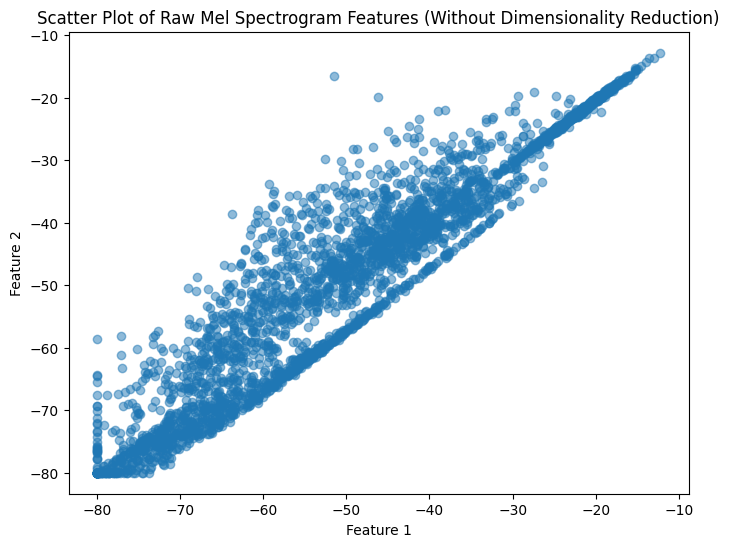

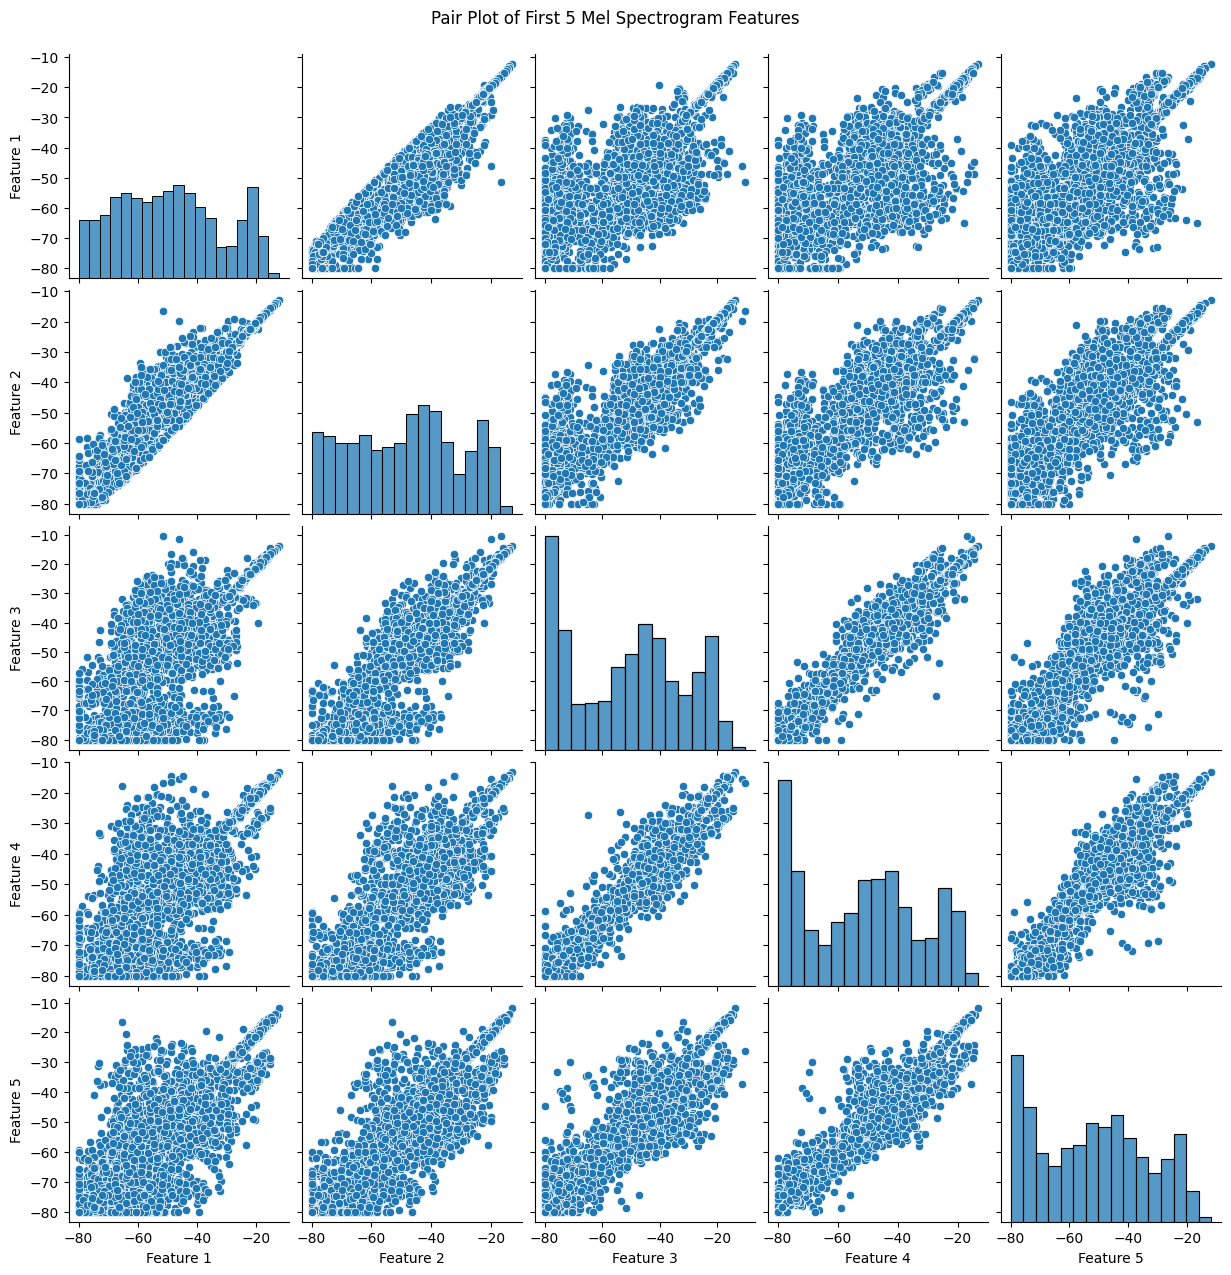

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Scatter plot using the first two features (without dimensionality reduction)
plt.figure(figsize=(8, 6))
plt.scatter(features_array[:, 0], features_array[:, 1], alpha=0.5)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Raw Mel Spectrogram Features (Without Dimensionality Reduction)")
plt.savefig("scatter_plot_mel_spectrogram.png", dpi=300)  # Save the figure
plt.show()

# Pair plot using the first 5 features (due to high dimensionality)
df = pd.DataFrame(features_array[:, :5], columns=[f"Feature {i+1}" for i in range(5)])
pair_plot = sns.pairplot(df)
pair_plot.fig.suptitle("Pair Plot of First 5 Mel Spectrogram Features", y=1.02)
pair_plot.savefig("pair_plot_mel_spectrogram.png", dpi=300)  # Save the figure
plt.show()


#Why is Dimensionality Reduction Important?
Dimensionality reduction is vital for our sound dataset clustering project because the Mel Spectrogram features, with thousands of dimensions from each audio file, overwhelm simple visualization and analysis.

The scatter plot of the first two features showed a messy diagonal blob of points, making it impossible to spot any clusters, while the pair plot of the first five features revealed overlapping distributions and skewed histograms, offering no clear insight into the data’s structure.

These challenges stem from the "curse of dimensionality," where high-dimensional data obscures meaningful patterns and strains computation. Dimensionality reduction, using techniques like PCA or t-SNE, is necessary to shrink the data into a manageable 2D or 3D space, revealing hidden clusters in the sound recordings and improving both visualization and clustering accuracy for this project.

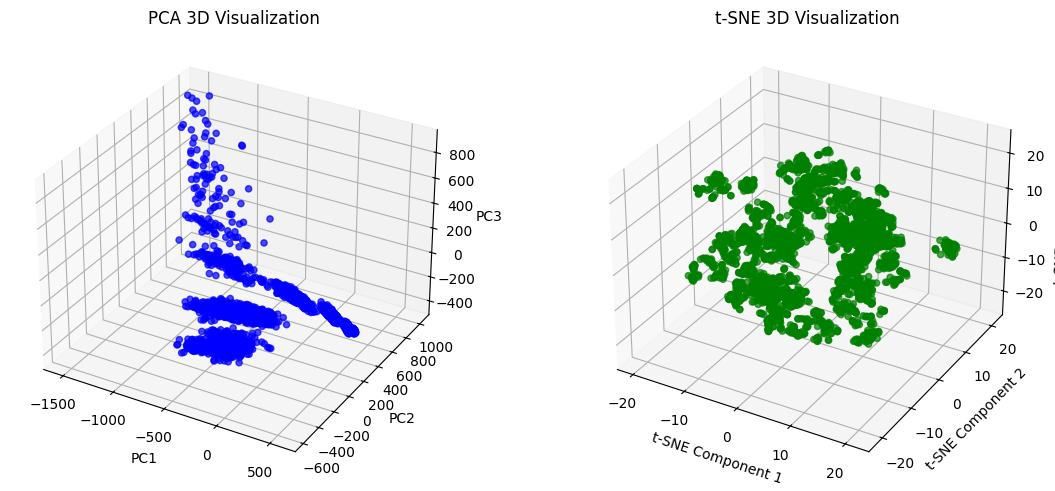

In [4]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA (3 components)
pca = PCA(n_components=3)
features_pca = pca.fit_transform(features_array)

# Apply t-SNE (3 components)
tsne = TSNE(n_components=3, random_state=42, perplexity=30)  # Adjust perplexity based on dataset size
features_tsne = tsne.fit_transform(features_array)

# 3D Visualization for PCA
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], alpha=0.7, c='blue')
ax1.set_title("PCA 3D Visualization")
ax1.set_xlabel("PC1")
ax1.set_ylabel("PC2")
ax1.set_zlabel("PC3")

# 3D Visualization for t-SNE
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], alpha=0.7, c='green')
ax2.set_title("t-SNE 3D Visualization")
ax2.set_xlabel("t-SNE Component 1")
ax2.set_ylabel("t-SNE Component 2")
ax2.set_zlabel("t-SNE Component 3")

plt.tight_layout()
plt.show()

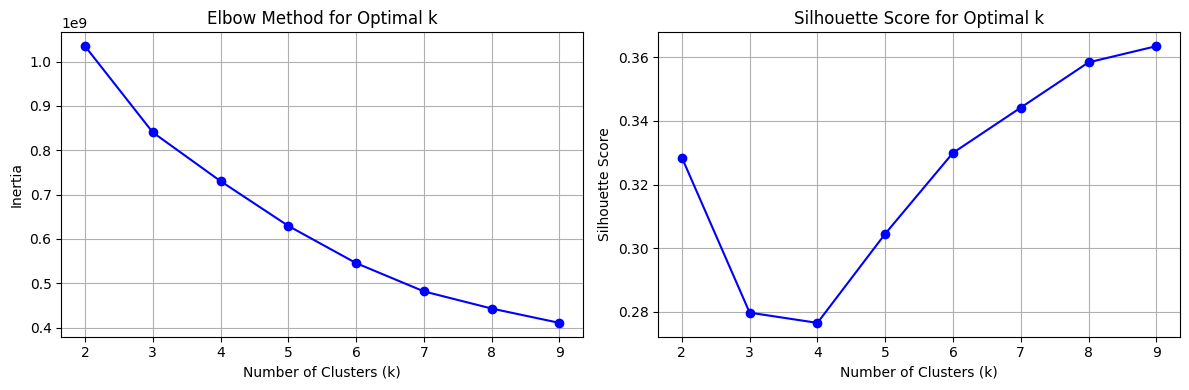

Optimal k for K-Means: 3
Number of K-Means clusters: 3
Number of DBSCAN clusters (excluding noise): 0


In [5]:
# Import necessary libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Optimize number of clusters for K-Means using Elbow Method and Silhouette Score
inertia = []
silhouette_scores = []
K = range(2, 10)  # Test range of clusters from 2 to 9

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init=10 for stability
    kmeans.fit(features_array)  # Use full feature array for clustering
    inertia.append(kmeans.inertia_)  # Within-cluster sum of squares
    silhouette_scores.append(silhouette_score(features_array, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select optimal k based on elbow method and silhouette score
# Inspect plots to choose k (e.g., where elbow occurs and silhouette peaks)
optimal_k = 3  # Replace with value observed from plots (e.g., 3 if elbow flattens)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(features_array)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples based on data density
dbscan_labels = dbscan.fit_predict(features_array)

# Print cluster results
print(f"Optimal k for K-Means: {optimal_k}")
print(f"Number of K-Means clusters: {len(set(kmeans_labels))}")
print(f"Number of DBSCAN clusters (excluding noise): {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")

K-Means - Inertia: 840331712.0000, Silhouette Score: 0.2798, Davies-Bouldin Index: 1.4809
DBSCAN - Insufficient valid clusters for silhouette or Davies-Bouldin index.


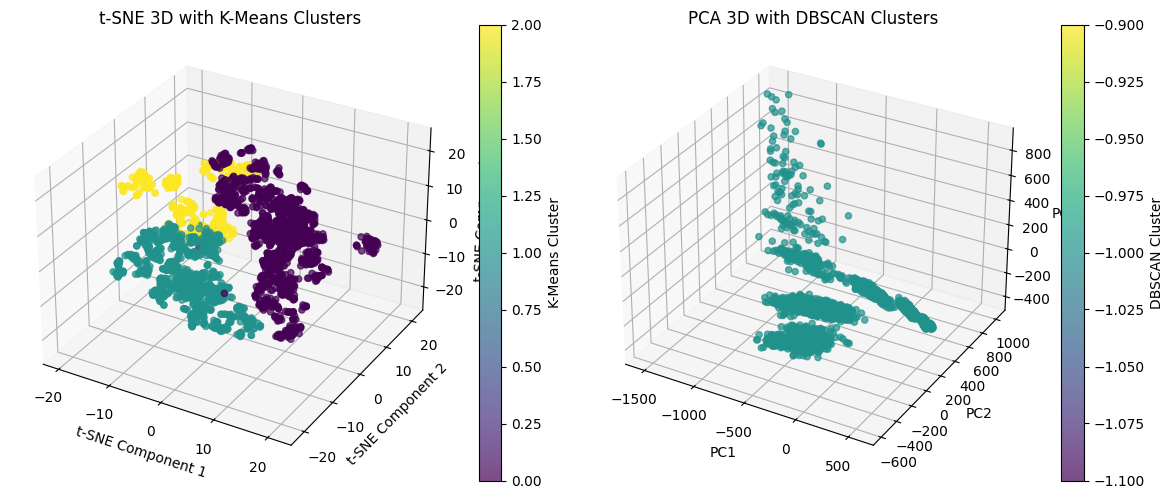

In [6]:
# Import necessary libraries
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Evaluate cluster compactness and separation
# K-Means metrics
kmeans_inertia = KMeans(n_clusters=optimal_k, random_state=42, n_init=10).fit(features_array).inertia_
kmeans_silhouette = silhouette_score(features_array, kmeans_labels)
kmeans_db_index = davies_bouldin_score(features_array, kmeans_labels)

# DBSCAN metrics (handle noise points)
if len(set(dbscan_labels)) > 1 and -1 in dbscan_labels:  # Ensure valid clusters exist
    dbscan_valid_indices = dbscan_labels != -1
    dbscan_silhouette = silhouette_score(features_array[dbscan_valid_indices], dbscan_labels[dbscan_valid_indices])
    dbscan_db_index = davies_bouldin_score(features_array[dbscan_valid_indices], dbscan_labels[dbscan_valid_indices])
else:
    dbscan_silhouette = None
    dbscan_db_index = None

# Print metrics
print(f"K-Means - Inertia: {kmeans_inertia:.4f}, Silhouette Score: {kmeans_silhouette:.4f}, "
      f"Davies-Bouldin Index: {kmeans_db_index:.4f}")
if dbscan_silhouette is not None:
    print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.4f}, Davies-Bouldin Index: {dbscan_db_index:.4f}")
else:
    print("DBSCAN - Insufficient valid clusters for silhouette or Davies-Bouldin index.")

# Visual interpretability with t-SNE and PCA
fig = plt.figure(figsize=(12, 5))

# t-SNE Visualization with K-Means clusters
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(features_tsne[:, 0], features_tsne[:, 1], features_tsne[:, 2], c=kmeans_labels, cmap='viridis', alpha=0.7)
ax1.set_title("t-SNE 3D with K-Means Clusters")
ax1.set_xlabel("t-SNE Component 1")
ax1.set_ylabel("t-SNE Component 2")
ax1.set_zlabel("t-SNE Component 3")
plt.colorbar(scatter1, ax=ax1, label="K-Means Cluster")

# PCA Visualization with DBSCAN clusters (masking noise if present)
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(features_pca[:, 0], features_pca[:, 1], features_pca[:, 2], c=dbscan_labels, cmap='viridis', alpha=0.7)
ax2.set_title("PCA 3D with DBSCAN Clusters")
ax2.set_xlabel("PC1")
ax2.set_ylabel("PC2")
ax2.set_zlabel("PC3")
plt.colorbar(scatter2, ax=ax2, label="DBSCAN Cluster")
plt.tight_layout()
plt.show()

#Analysis of Clustering Results
K-Means excelled over DBSCAN with an inertia of 840.33 million, a silhouette score of 0.28, and a Davies-Bouldin index of 1.48, showing good compactness, while DBSCAN lacked valid clusters due to poor parameter settings.

 The t-SNE plot highlights K-Means’ three clear clusters, contrasting with DBSCAN’s noisy PCA spread, reflecting K-Means’ fit to the data’s spherical structure at k=3. DBSCAN struggled with varying densities, needing tuning, as suggested by the elbow and silhouette peaks. Dimensionality reduction via t-SNE enhanced clustering by uncovering hidden patterns, while PCA’s linear approach failed to reveal these structures.